In [2]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
from scipy import interpolate
%matplotlib inline
from matplotlib.patches import Rectangle


np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True) #prevents scientific notation for 40 character numbers

/opt/anaconda3/envs/Git_JupyterLab/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
### Read in data file

GSample = fits.open('/Users/edm/Library/CloudStorage/Dropbox/Data/100pc_rvnotnull-Matched-Best.fits')
GSample_A3 = Table(GSample[1].data)

In [4]:
## print length of table

len(GSample_A3)

167020

In [5]:
## take a look at columns

GSample_A3

<Table length=167020>
    SOURCE_ID_1            RA_1         RA_ERROR_1 ... teff_gspphot   vbroad 
       int64             float64         float64   ...   float32     float32 
------------------- ------------------ ----------- ... ------------ ---------
5853498713190525696 217.39232147200883 0.023999203 ...    2829.3542       nan
4472832130942575872 269.44850252543836 0.026238997 ...    3099.6335       nan
 762815470562110464 165.83095967577933 0.024125582 ...     3511.045 10.002441
4075141768785646848  282.4587890175222 0.029065154 ...     3117.376       nan
1926461164913660160  355.4800152581559  0.03218242 ...          nan       nan
6553614253923452800  346.5039166796005 0.017067203 ...    3376.0845  5.767302
1872046574983497216   316.753662752556 0.018972972 ...    3889.6328 6.9816794
1872046609345556480  316.7484792940004  0.03876041 ...    4353.7437 5.7024636
2154880616774131840  280.6830708352289 0.021600218 ...     3352.192       nan
2154880616774131712 280.68308624583415 0.030707553 ...    3179.6333       nan
                ...                ...         ... ...          ...       ...
4072503039634788736  280.0046318198612 0.015781714 ...     3620.593       nan
1997756625600681600 353.09671688774444 0.015836248 ...    3491.9302       nan
4191162991637325824  302.3955216980271 0.014745331 ...     5205.402       nan
5761035592009134848 132.65107615466013 0.046826992 ...          nan 20.349188
5055343362578489344 53.619121006456545 0.015574422 ...    3470.5942       nan
1407928457594520576 253.50218132917882   0.0172391 ...    3491.9934       nan
6832879006104020096 318.17681412703587  0.02378706 ...    3551.0818       nan
  71475475647268736  55.05770921046282 0.041410603 ...    3442.6294       nan
 473881441333817984  60.74761405694887 0.010009908 ...    5576.3228       nan
 518180210764160512  30.15544146978542 0.008064788 ...     3871.986       nan

In [6]:
#added in kinematics for brown dwarf 1227133699053734528 from eileen's paper

df = GSample_A3.to_pandas()
new_row = {'source_id_2':1227133699053734528, 'SOURCE_ID_1':1227133699053734528, 'RA_1':214.10070487061, 'DEC_1':13.80784459098, 'PARALLAX_1':107.7375, 'PARALLAX_ERROR_1':0.2163, 'PMRA_1':86.670, 'PMRA_ERROR_1':0.291, 'PMDEC_1':127.953, 'PMDEC_ERROR_1':0.198, 'PHOT_BP_MEAN_MAG_1':21.552280, 'PHOT_BP_MEAN_FLUX_OVER_ERROR_1':0.204305, 'PHOT_RP_MEAN_MAG_1':16.681887, 'PHOT_RP_MEAN_FLUX_OVER_ERROR_1':0.009775, 'parallax_2':107.7375, 'phot_g_mean_mag_2':18.353840, 'phot_bp_mean_mag_2':21.552280, 'phot_rp_mean_mag_2':16.681887, 'radial_velocity':-42.38, 'radial_velocity_error':0.5399999999999991, 'teff_gspphot':np.nan}
GSample_A2 = df.append(new_row, ignore_index = True)


/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_949/775844516.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSample_A2 = df.append(new_row, ignore_index = True)


In [7]:
GSample_A2

SOURCE_ID_1        RA_1  RA_ERROR_1      DEC_1  DEC_ERROR_1  \
0       5.853499e+18  217.392321    0.023999 -62.676075     0.034436   
1       4.472832e+18  269.448503    0.026239   4.739420     0.029044   
2       7.628155e+17  165.830960    0.024126  35.948653     0.029373   
3       4.075142e+18  282.458789    0.029065 -23.837097     0.026151   
4       1.926461e+18  355.480015    0.032182  44.170376     0.021303   
...              ...         ...         ...        ...          ...   
167016  6.832879e+18  318.176814    0.023787 -19.639974     0.017113   
167017  7.147548e+16   55.057709    0.041411  28.350757     0.027147   
167018  4.738814e+17   60.747614    0.010010  60.727335     0.009679   
167019  5.181802e+17   30.155441    0.008065  65.266687     0.009164   
167020  1.227134e+18  214.100705         NaN  13.807845          NaN   

        PARALLAX_1  PARALLAX_ERROR_1       PMRA_1  PMRA_ERROR_1       PMDEC_1  \
0       768.066539          0.049873 -3781.741008      0.031386    769.465015   
1       546.975940          0.040116  -801.550978      0.031821  10362.394207   
2       392.752945          0.032067  -580.057087      0.025566  -4776.588719   
3       336.026602          0.031666   639.367850      0.036839   -193.957925   
4       316.481187          0.044449   112.527465      0.036434  -1591.649762   
...            ...               ...          ...           ...           ...   
167016   10.000128          0.032527    70.639798      0.032993      0.940239   
167017   10.000066          0.048958    42.979413      0.043987    -28.578830   
167018   10.000032          0.013737   -44.060846      0.017111     32.695987   
167019   10.000029          0.012865   -42.988428      0.010003     42.605428   
167020  107.737500          0.216300    86.670000      0.291000    127.953000   

        ...       pmra_2       pmdec_2  phot_g_mean_mag_2  phot_bp_mean_mag_2  \
0       ... -3781.741008    769.465015           8.984749           11.373116   
1       ...  -801.550978  10362.394207           8.193974            9.791788   
2       ...  -580.057087  -4776.588719           6.551172            7.691122   
3       ...   639.367850   -193.957925           9.126414           10.732183   
4       ...   112.527465  -1591.649762          10.379277           12.546428   
...     ...          ...           ...                ...                 ...   
167016  ...    70.639798      0.940239          14.719197           16.046291   
167017  ...    42.979413    -28.578830          15.506643           16.973078   
167018  ...   -44.060846     32.695987           9.267752            9.624231   
167019  ...   -42.988428     42.605428          13.608475           14.623214   
167020  ...          NaN           NaN          18.353840           21.552280   

        phot_rp_mean_mag_2  radial_velocity  radial_velocity_error  \
0                 7.568535       -21.942726               0.216127   
1                 6.958091      -110.468224               0.131255   
2                 5.475513       -85.110641               0.131003   
3                 7.898147       -11.116440               0.565507   
4                 9.017014       -77.289825               0.185324   
...                    ...              ...                    ...   
167016           13.585066       -15.876756               2.726470   
167017           14.323343       -12.006425               8.943284   
167018            8.743373         8.298397               0.155001   
167019           12.597395       -57.091637               1.474421   
167020           16.681887       -42.380000               0.540000   

        rv_template_teff  teff_gspphot     vbroad  
0                 3500.0   2829.354248        NaN  
1                 3300.0   3099.633545        NaN  
2                 3900.0   3511.044922  10.002441  
3                 3100.0   3117.375977        NaN  
4                 3200.0           NaN        NaN  
...                  ...           ...       

In [10]:
#GSample_A3[np.argsort(med_d_per)[0:10]]

In [11]:
## pull out variables on interest

#radial velocity
Rvel = np.asarray(GSample_A2["radial_velocity"])
rv=Rvel

rv_e = np.asarray(GSample_A2["radial_velocity_error"]) 


# PM RA and Dec
PMD = np.asarray(GSample_A2['PMDEC_1'])
PMR = np.asarray(GSample_A2['PMRA_1'])
PMR_e = np.asarray(GSample_A2['PMRA_ERROR_1'])
PMD_e = np.asarray(GSample_A2['PMDEC_ERROR_1'])

#RA and DEc ICRS
ra = np.asarray(GSample_A2['RA_1'])
dec = np.asarray(GSample_A2['DEC_1'])

#galactic coords
y = np.asarray(GSample_A2['YCOORD_50'])
x = np.asarray(GSample_A2['XCOORD_50'])
z = np.asarray(GSample_A2['ZCOORD_50'])

#parallax
plx = np.asarray(GSample_A2['PARALLAX_1'])
plx_e = np.asarray(GSample_A2['PARALLAX_ERROR_1'])

#median distanc

## read in temperature
teff=np.asarray(GSample_A2['teff_gspphot'])
## temperature has no error

source_id = np.asarray(GSample_A2["source_id_2"])

## read in mags
phot_bp_mean_mag = np.asarray(GSample_A2['PHOT_BP_MEAN_MAG_1'])
phot_bp_mean_mag_err = np.asarray(1/GSample_A2['PHOT_BP_MEAN_FLUX_OVER_ERROR_1']) * phot_bp_mean_mag

phot_rp_mean_mag = np.asarray(GSample_A2['PHOT_RP_MEAN_MAG_1'])
phot_rp_mean_mag_err = np.asarray(1/GSample_A2['PHOT_RP_MEAN_FLUX_OVER_ERROR_1']) * phot_rp_mean_mag

## for zero point 
ecl_lat = np.asarray(GSample_A2['ecl_lat'])


In [12]:
1/107.7375 *1000

9.281819236570367

In [13]:
plx[167020] #checks the parallax of 167020 (J1416AB)

107.7375

In [14]:
# Variables for Brown Dwarfs

#radial velocity
#BD_rv=np.asarray(-86.95241909233778)
BD_rv=np.asarray(-42.38)
BD_rv_e=np.asarray(0.5399999999999991)

BD_ras = np.asarray(214.10070487061)
BD_ras_err = np.asarray(0.1901)
BD_decs = np.asarray(13.80784459098)
BD_decs_err = np.asarray(0.1510)
# PM RA and Dec
BD_PMD = np.asarray(127.953)
BD_PMD_err = np.asarray(0.198)
BD_PMR = np.asarray(86.670)
BD_PMR_err = np.asarray(0.291)

#parallax
BD_plx = np.asarray(107.7375)
BD_plx_err = np.asarray(0.2163)

## temperature has no error
BD_Bp_Rp = np.asarray(4.870394)

BD_PHOT_BP_MEAN_MAG_1 = np.asarray(21.552280)
BD_PHOT_BP_MEAN_MAG_1_err = np.asarray(0.204305)
BD_PHOT_RP_MEAN_MAG_1 = np.asarray(16.681887)
BD_PHOT_RP_MEAN_MAG_1_err = np.asarray(0.009775)


In [15]:
### Create arrays for everything
npts        = 1000
rv_array    = np.zeros((len(GSample_A2),npts))
pmra_array  = rv_array*0
pmdec_array = rv_array*0
plx_array   = rv_array*0
bp_array    = rv_array*0
rp_array    = rv_array*0

#Creates a guassian distribbution from the error bars provided
for i in range(0,len(GSample_A2)):
    rv_array[i,:] = np.random.normal(rv[i],rv_e[i],npts)
    pmra_array[i,:] = np.random.normal(PMR[i],PMR_e[i],npts)
    pmdec_array[i,:] = np.random.normal(PMD[i],PMD_e[i],npts)
    plx_array[i,:] = np.random.normal(plx[i],plx_e[i],npts)
    bp_array[i,:] = np.random.normal(phot_bp_mean_mag[i],phot_bp_mean_mag_err[i],npts)
    rp_array[i,:] = np.random.normal(phot_rp_mean_mag[i],phot_rp_mean_mag_err[i],npts)

#period_dist = np.random.normal(period, period_e, 10000)

Parallax:
52.39685926573553


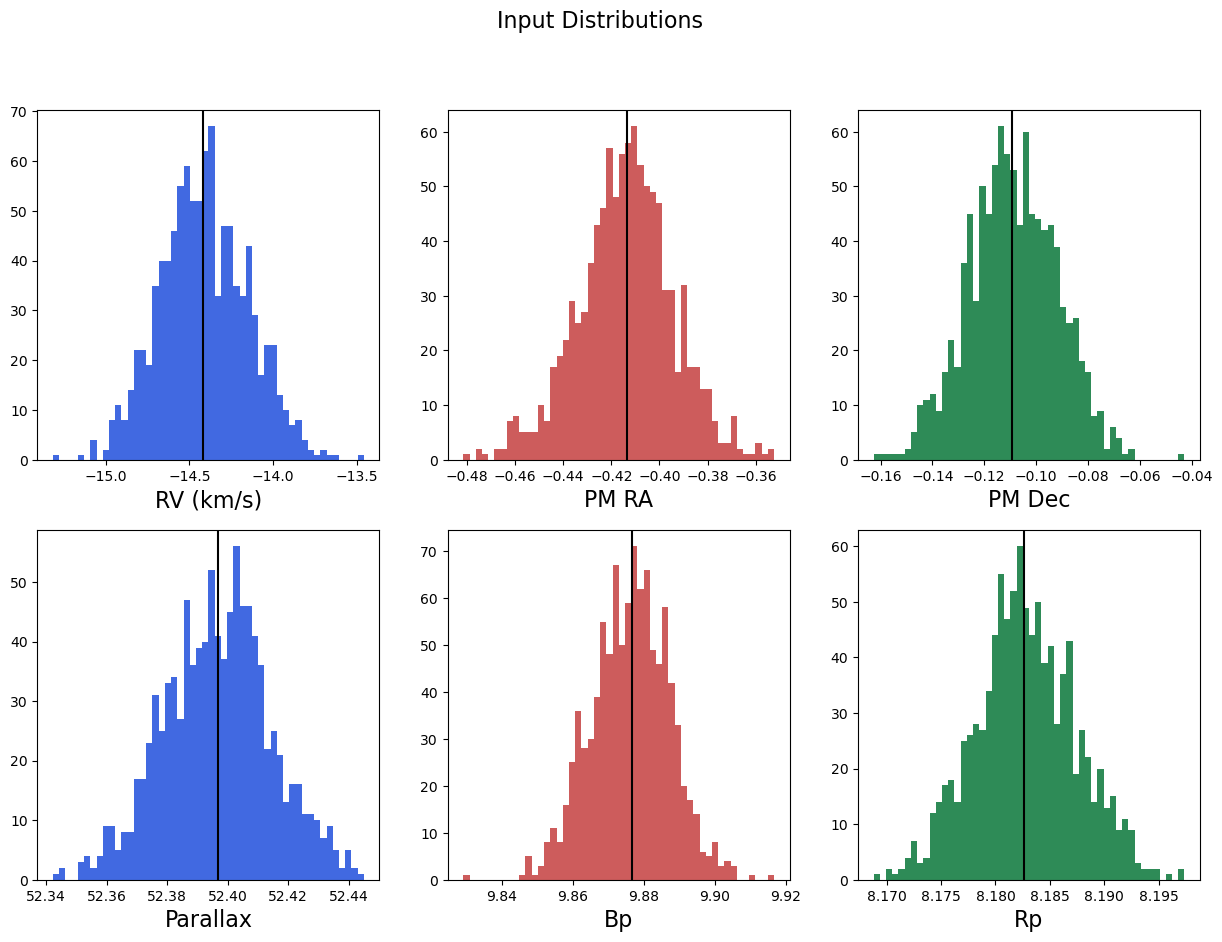

In [16]:
## plot the input arrays for GL710 to make sure we're using the right numbers

ID = int(np.where(source_id==4270814637616488064)[0])


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Input Distributions', fontsize=16)
ax1.hist(rv_array[ID,:],bins=50,color='royalblue')
ax2.hist(pmra_array[ID,:],bins=50,color='indianred')
ax3.hist(pmdec_array[ID,:],bins=50,color='seagreen')
ax4.hist(plx_array[ID,:],bins=50,color='royalblue')
ax5.hist(bp_array[ID,:],bins=50,color='indianred')
ax6.hist(rp_array[ID,:],bins=50,color='seagreen')

ax1.axvline(np.median(rv_array[ID,:]),color='black')
ax2.axvline(np.median(pmra_array[ID,:]),color='black')
ax3.axvline(np.median(pmdec_array[ID,:]),color='black')
ax4.axvline(np.median(plx_array[ID,:]),color='black')
ax5.axvline(np.median(bp_array[ID,:]),color='black')
ax6.axvline(np.median(rp_array[ID,:]),color='black')



ax1.set_xlabel('RV (km/s)', fontsize=16)
ax2.set_xlabel('PM RA', fontsize=16)
ax3.set_xlabel('PM Dec', fontsize=16)
ax4.set_xlabel('Parallax', fontsize=16)
ax5.set_xlabel('Bp', fontsize=16)
ax6.set_xlabel('Rp', fontsize=16)


print("Parallax:")
print(np.median(plx_array[ID,:]))

In [17]:
# This is a white dwarf whose RV needs to be corrected -- I have hard-coded 39.4 value. 
# Should update this! Via: 

# calculation here: https://www.wolframalpha.com/input?i=%28speed+of+light%29*%28%281-2*%28gravitational+constant%29*%280.7*%28mass+of+the+Sun%29%29%2F%28%281.234*%28radius+of+the+Earth%29%29*%28speed+of+light%29%5E2%29%29%5E%28-1%2F2%29-1%29

# and Here’s how I got the radius from log g and mass:
#https://www.wolframalpha.com/input?i=sqrt%280.7*%28mass+of+the+Sun%29%2F%28%2810%5E%288.177%29++centimeters%2Fsecond%5E2%29%2F%28gravitational+constant%29%29%29%2F%28radius+of+the+Earth%29

object_of_interest = np.where(source_id==5544743925212648320)
rv_array[object_of_interest,:] = rv_array[object_of_interest,:] - 39.4

## sanity check that this worked

print(np.mean(rv_array[object_of_interest,:]))

-413.1470890434948


In [18]:
## Calculate Bp_Rp color for each object in sample

Bp_Rp = phot_bp_mean_mag - phot_rp_mean_mag


In [19]:
#Calculates brown dwarf J1416AB perihelion values
BD_pmtot_array = np.sqrt(BD_PMR**2+BD_PMD**2)
BD_vtan_array = (4.74/BD_plx)*BD_pmtot_array
BD_vtot_array = (np.sqrt(BD_vtan_array**2+BD_rv**2))
c1 = 0.9779*10**9
c2 = 4.74047

In [20]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_array = np.sqrt(pmra_array**2+pmdec_array**2)
vtan_array = (c2/plx_array)*pmtot_array
vtot_array = (np.sqrt(vtan_array**2+rv_array**2))





In [21]:
c1 = 0.9779*10**9
c2 = 4.74047

BD_pmtot_array = np.sqrt(BD_PMR**2+BD_PMD**2)
BD_vtan_array = (c2/BD_plx)*BD_pmtot_array
BD_vtot_array = (np.sqrt(BD_vtan_array**2+BD_rv**2))

Text(0.5, 0, 'v$_r$/v$_t$')

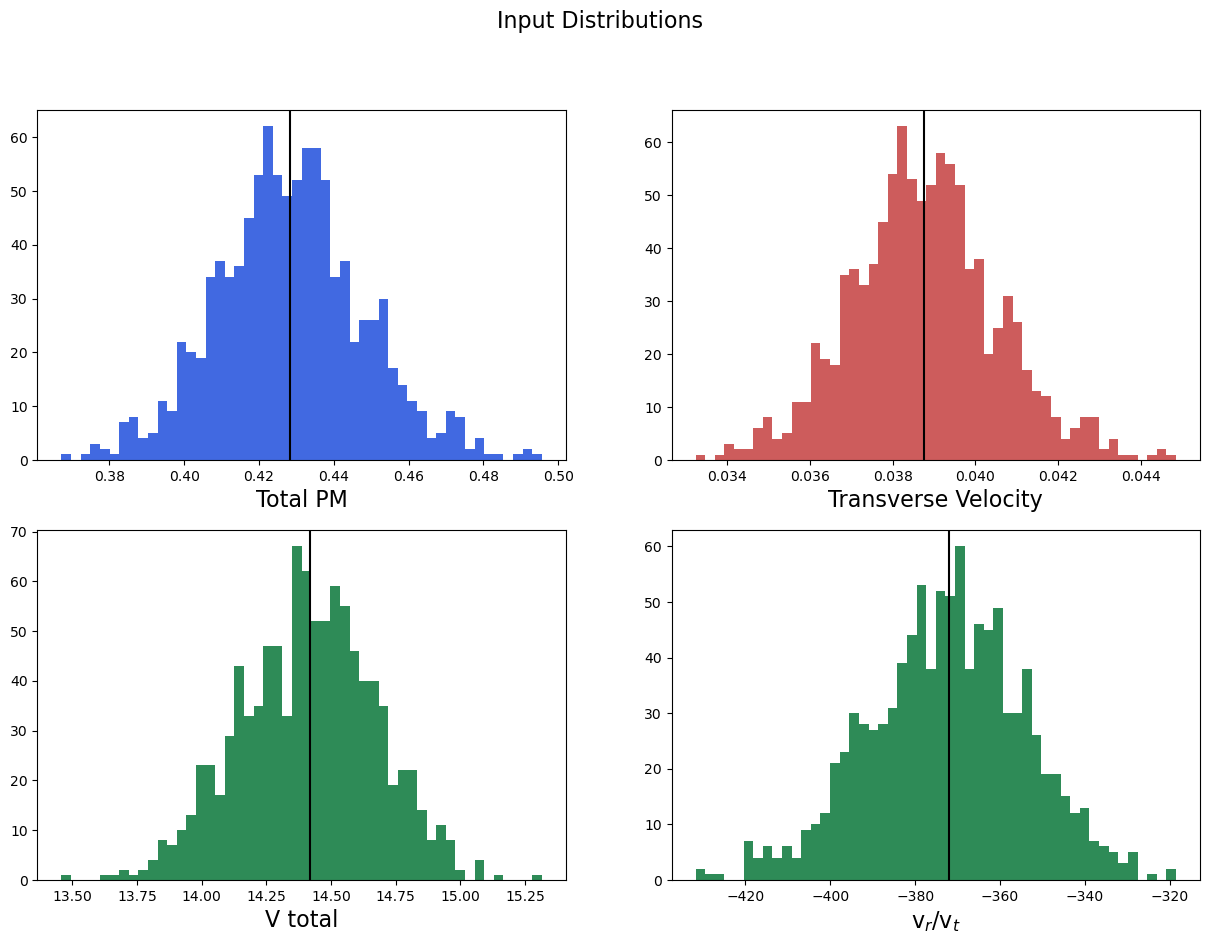

In [22]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Input Distributions', fontsize=16)
ax1.hist(pmtot_array[ID,:],bins=50,color='royalblue')
ax2.hist(vtan_array[ID,:],bins=50,color='indianred')
ax3.hist(vtot_array[ID,:],bins=50,color='seagreen')
ax4.hist(rv_array[ID,:]/vtan_array[ID,:],bins=50,color='seagreen')

 
ax1.axvline(np.median(pmtot_array[ID,:]),color='black')
ax2.axvline(np.median(vtan_array[ID,:]),color='black')
ax3.axvline(np.median(vtot_array[ID,:]),color='black')
ax4.axvline(np.median(rv_array[ID,:]/vtan_array[ID,:]),color='black')


ax1.set_xlabel('Total PM', fontsize=16)
ax2.set_xlabel('Transverse Velocity', fontsize=16)
ax3.set_xlabel('V total', fontsize=16)
ax4.set_xlabel('v$_r$/v$_t$', fontsize=16)


In [23]:
##### Caalculate the perihelion distance and perihelion time for our sample:


#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

print(plx_array.shape)
print(rv_array.shape)
print(vtot_array.shape)
print(vtan_array.shape)

## set up arrays for perihelion distance and time
t_per=plx_array * 0
d_per=plx_array * 0

for i in range(0,len(source_id)):
    t_per[i,:] = -c1*(1/plx_array[i,:])*(rv_array[i,:]/vtot_array[i,:]**2)
    d_per[i,:] = 10**3*(1/plx_array[i,:])*(vtan_array[i,:]/vtot_array[i,:])

#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

(167021, 1000)
(167021, 1000)
(167021, 1000)
(167021, 1000)


Source ID: 
4.270814637616488e+18
Perihelion Time (Myr) =    1.294 
 Range:    1.272 -    1.319 Myr
Perihelion Distance (pc) =    0.051 
 Range:    0.049 -    0.054 pc


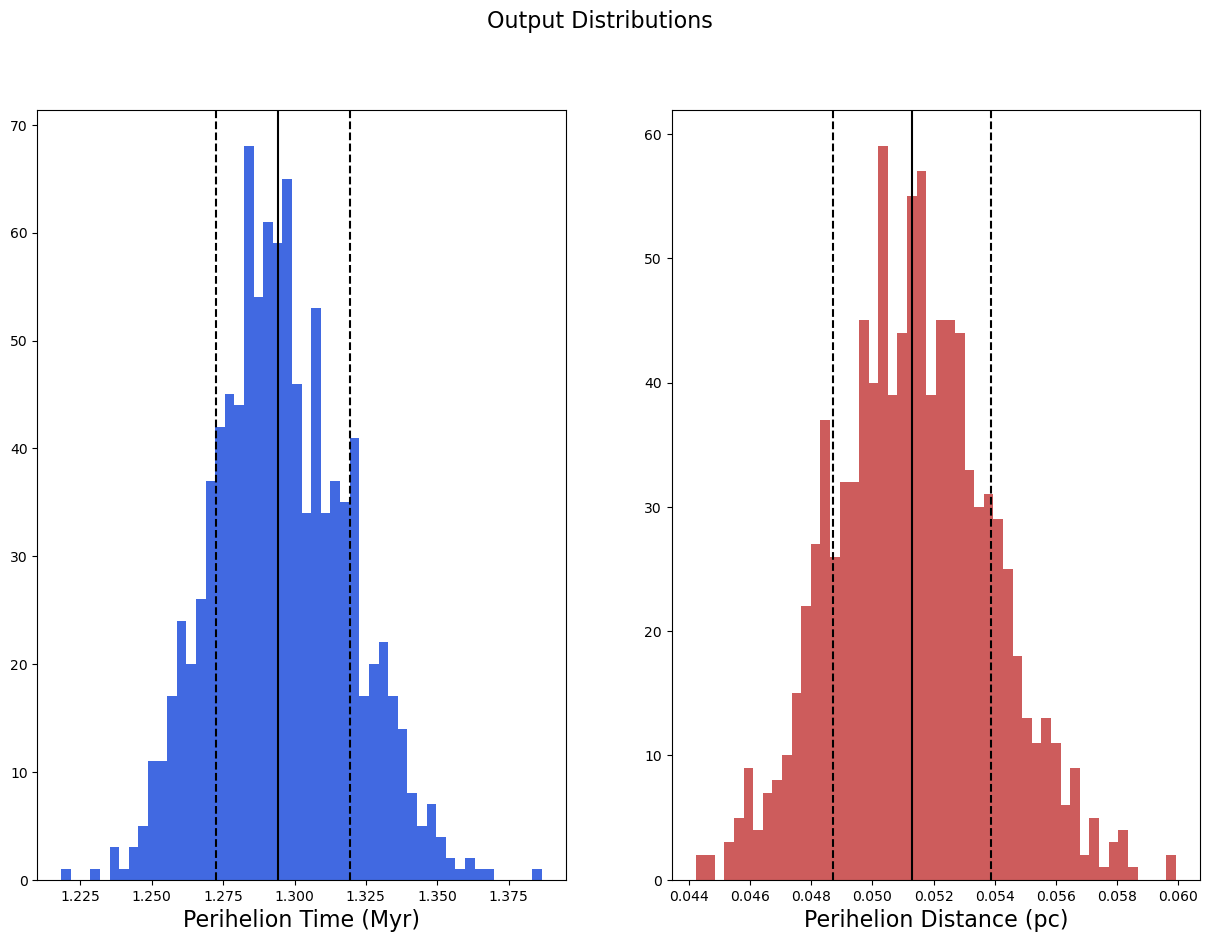

In [24]:
### plot a results for G710 to make sure we're getting the right numbers

ID = int(np.where(source_id==4270814637616488064)[0])


fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle('Output Distributions', fontsize=16)
ax1.hist(t_per[ID,:]/10**6,bins=50,color='royalblue')
ax2.hist(d_per[ID,:],bins=50,color='indianred')


 
ax1.set_xlabel('Perihelion Time (Myr)', fontsize=16)
ax2.set_xlabel('Perihelion Distance (pc)', fontsize=16)


ax1.axvline(np.median(t_per[ID,:]/10**6),color='black')
ax1.axvline(np.percentile(t_per[ID,:]/10**6,[16]),color='black',linestyle='dashed')
ax1.axvline(np.percentile(t_per[ID,:]/10**6,[84]),color='black',linestyle='dashed')


ax2.axvline(np.median(d_per[ID,:]),color='black')
ax2.axvline(np.percentile(d_per[ID,:],[16]),color='black',linestyle='dashed')
ax2.axvline(np.percentile(d_per[ID,:],[84]),color='black',linestyle='dashed')

print("Source ID: ")
print(source_id[ID])
print("Perihelion Time (Myr) = %8.3f \n Range: %8.3f - %8.3f Myr" % (np.median(t_per[ID,:]/10**6), np.percentile(t_per[ID,:]/10**6,[16]), np.percentile(t_per[ID,:]/10**6,[84])))
print("Perihelion Distance (pc) = %8.3f \n Range: %8.3f - %8.3f pc"% (np.median(d_per[ID,:]), np.percentile(d_per[ID,:],[16]), np.percentile(d_per[ID,:],[84])))


BD_high_err2 = []
BD_low_err2 = []
for i in range(0,len(source_id)):
    BD_high = np.quantile(BD_d_per[i], [.95])
    BD_low = np.quantile(BD_d_per[i], [.05])
    
    BD_high_err2.append(BD_high)
    BD_low_err2.append(BD_low)

BD_high_err = np.hstack(BD_high_err2)
BD_low_err = np.hstack(BD_low_err2)


In [25]:
#Creates an empty array so the upper quartile from the vtan mc has a place to put new values
empty_vtan_array = []
for i in range(0,len(source_id)):
    high = np.quantile(vtan_array[i], [.5])
    
    empty_vtan_array.append(high)

vtan = np.hstack(empty_vtan_array)

In [26]:
vtan[167020]

6.800258078552993

In [27]:
#Creates empty arrayes to put the upper quartile and lower quantile for the perihelion distance
upper_d_quantile_array = []
lower_d_quantile_array = []
for i in range(0,len(source_id)):
    high = np.quantile(d_per[i], [.95])
    low = np.quantile(d_per[i], [.05])
    
    upper_d_quantile_array.append(high)
    lower_d_quantile_array.append(low)

high_err = np.hstack(upper_d_quantile_array)
low_err = np.hstack(lower_d_quantile_array)



In [28]:
#upper limit of brown dwarf distance 
high_err[167020]

1.5033804349901627

In [29]:
low_err[167020] #lower limit of brown dwarf distance

1.440423955442069

In [30]:
high_err[1561]

0.05567378082739908

In [31]:
low_err[1561]


0.04736310488056614

In [32]:
y_err = high_err - low_err

In [33]:
y_err[167020] #brown dwarf

0.06295647954809369

In [34]:
#Creates empty arrayes to put the upper quartile and lower quantile for the perihelion time
upper_t_quantile_array = []
lower_t_quantile_array = []
for i in range(0,len(source_id)):
    high = np.quantile(t_per[i], [.95])
    low = np.quantile(t_per[i], [.05])
    
    upper_t_quantile_array.append(high)
    lower_t_quantile_array.append(low)

th_err = np.hstack(upper_t_quantile_array)
tl_err = np.hstack(lower_t_quantile_array)

In [35]:
th_err[167020]/10**6 #this is the upper limit of brown dwarf time 

0.21326560552602425

In [36]:
tl_err[167020]/10**6 #this is the lower limit of brown dwarf time

0.20473370267351662

In [37]:
th_err[1561]/10**6 #gliese 710

1.3349950073630363

In [38]:
tl_err[1561]/10**6 #this is for gliese 710

1.258447161257389

In [39]:
x_err = th_err - tl_err

In [40]:
high_err[1561]

0.05567378082739908

In [41]:
## calculate medians:
med_t_per = np.mean(t_per,axis=1)/10**6
med_d_per = np.mean(d_per,axis=1)
med_v_per = np.mean(vtot_array,axis=1)

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_949/577917719.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_per[np.argsort(med_d_per)[0:25]], med_d_per[np.argsort(med_d_per)[0:25]], y_err[np.argsort(med_d_per)[0:25]], x_err[np.argsort(med_d_per)[0:25]]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


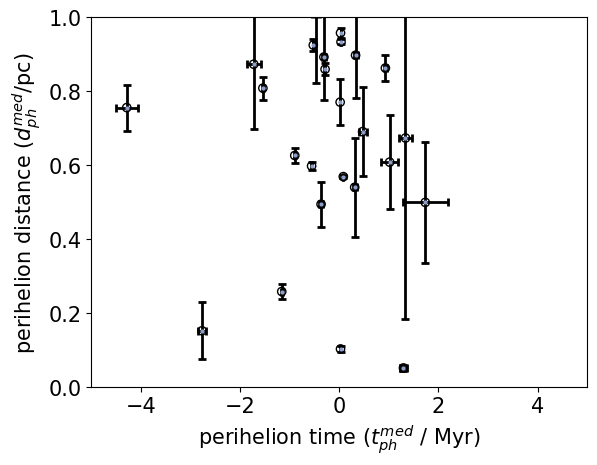

In [42]:
plt.scatter(med_t_per[np.argsort(med_d_per)[0:25]], med_d_per[np.argsort(med_d_per)[0:25]], facecolor = 'none', edgecolor = 'black')
plt.errorbar(med_t_per[np.argsort(med_d_per)[0:25]], med_d_per[np.argsort(med_d_per)[0:25]], y_err[np.argsort(med_d_per)[0:25]], x_err[np.argsort(med_d_per)[0:25]]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

# BD Monte Carlo

In [43]:
### Read in data file


GSampleBD = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/Mass Bd sampls (dino).fits')
GSample_BD2 = Table(GSampleBD[1].data)

In [44]:
GSample_BD2

<Table length=136>
   Name    f_Name   RAJ2000     DEJ2000    ... recno    SpT         Mass    
  str11     str1     str11       str12     ... int16   str12      float64   
---------- ------ ----------- ------------ ... ----- --------- -------------
J1438+6408        14 38 08.26 +64 08 36.30 ...    88        L0 0.07729007634
J1731+2721      c 17 31 29.74 +27 21 23.20 ...   115        L0 0.07729007634
J0024-0158        00 24 24.63 -01 58 19.90 ...     5      L0.5 0.07729007634
J0746+2000        07 46 42.49 +20 00 32.60 ...    50      L0.5 0.07729007634
J1221+0257        12 21 27.71 +02 57 19.70 ...    76      L0.5 0.07729007634
J0045+1634      b 00 45 21.41 +16 34 44.70 ...     9  L0{beta} 0.07729007634
J0015+3516        00 15 44.77 +35 16 02.60 ...     3        L1 0.07251908397
J0751-2530        07 51 16.30 -25 30 43.00 ...    51        L1 0.07251908397
J0921-2104        09 21 14.10 -21 04 44.40 ...    58        L1 0.07251908397
J1048+0111        10 48 42.81 +01 11 58.20 ...    65        L1 0.07251908397
       ...    ...         ...          ... ...   ...       ...           ...
J1707-0558        17 07 23.43 -05 58 24.90 ...   113     M9+L3  0.1498091603
J0109+2949        01 09 21.87 +29 49 26.40 ...    14      M9.5 0.07729007634
J0314+1603        03 14 03.44 +16 03 05.40 ...    25      M9.5 0.07729007634
J2234+2359        22 34 14.01 +23 59 55.80 ...   131      M9.5 0.07729007634
J0720-0846        07 20 03.25 -08 46 49.90 ...    48   M9.5+T5  0.1106870229
J0109-0343        01 09 51.20 -03 43 26.30 ...    15       M9e 0.07729007634
J0853-0329        08 53 36.16 -03 29 32.20 ...    57       M9e 0.07729007634
J1428+3310        14 28 43.22 +33 10 39.20 ...    87       M9e 0.07729007634
J0339-3525      e 03 39 35.25 -35 25 43.60 ...    29  M9{beta} 0.07729007634
J1331-0116        13 31 48.95 -01 16 50.10 ...    82 T0/L6blue 0.07729007634

In [45]:
dfBD = GSample_BD2.to_pandas()

In [46]:
dfBD

Name f_Name      RAJ2000       DEJ2000       SpTl   Jmag  e_Jmag  \
0    J1438+6408         14 38 08.26  +64 08 36.30         L0  12.99    0.02   
1    J1731+2721      c  17 31 29.74  +27 21 23.20         L0  12.09    0.03   
2    J0024-0158         00 24 24.63  -01 58 19.90       L0.5  11.99    0.04   
3    J0746+2000         07 46 42.49  +20 00 32.60       L0.5  11.76    0.02   
4    J1221+0257         12 21 27.71  +02 57 19.70       L0.5  13.07    0.01   
..          ...    ...          ...           ...        ...    ...     ...   
131  J0109-0343         01 09 51.20  -03 43 26.30        M9e  11.69    0.02   
132  J0853-0329         08 53 36.16  -03 29 32.20        M9e  11.21    0.03   
133  J1428+3310         14 28 43.22  +33 10 39.20         M9  11.99    0.02   
134  J0339-3525      e  03 39 35.25  -35 25 43.60   M9{beta}  10.73    0.02   
135  J1331-0116         13 31 48.95  -01 16 50.10  T0/L6blue    NaN     NaN   

     J-Ks  e_J-Ks        pmRA  ...  e_UVel       VVel  e_VVel       WVel  \
0    1.34    0.03  643.799988  ...    0.50  11.500000    1.90 -39.000000   
1    1.18    0.03  -90.199997  ...    0.06 -17.780001    0.08  -6.620000   
2    1.45    0.04  -77.199997  ...    0.20  25.799999    0.70   0.800000   
3    1.29    0.03 -370.000000  ...    0.50  -1.800000    0.50   7.700000   
4    1.16    0.01 -145.399994  ...    0.07   6.670000    0.08  -3.750000   
..    ...     ...         ...  ...     ...        ...     ...        ...   
131  1.27    0.03  372.000000  ...    0.50   0.040000    0.50  14.500000   
132  1.27    0.04 -516.900024  ...    1.10   2.700000    1.40 -10.000000   
133  1.25    0.03 -346.760010  ...    0.08 -37.080002    0.13 -20.200001   
134  1.18    0.03  308.899994  ...    0.20   6.900000    0.40   6.800000   
135   NaN     NaN         NaN  ...    2.20 -58.799999   13.50 -25.799999   

     e_WVel  Prob   Pop  recno        SpT     Mass  
0      2.00  0.22  D/TD     88         L0  0.07729  
1      0.05  0.01     D    115         L0  0.07729  
2      1.40  0.01     D      5       L0.5  0.07729  
3      1.10  0.01     D     50       L0.5  0.07729  
4      0.13  0.01     D     76       L0.5  0.07729  
..      ...   ...   ...    ...        ...      ...  
131    1.65  0.01     D     15        M9e  0.07729  
132    0.90  0.01     D     57        M9e  0.07729  
133    0.40  0.03     D     87        M9e  0.07729  
134    0.60  0.01     D     29   M9{beta}  0.07729  
135    5.70  0.27  D/TD     82  T0/L6blue  0.07729  

[136 rows x 35 columns]

In [47]:
## pull out variables on interest from the brown dwarf file

#radial velocity
rvbd = np.asarray(GSample_BD2["RV"])

rv_ebd = np.asarray(GSample_BD2["e_RV"]) 


# PM RA and Dec
PMDbd = np.asarray(GSample_BD2['pmDE'])
PMRbd = np.asarray(GSample_BD2['pmRA'])
PMR_ebd = np.asarray(GSample_BD2['e_pmRA'])
PMD_ebd = np.asarray(GSample_BD2['e_pmDE'])

#RA and DEc ICRS
dbd = np.asarray(GSample_BD2['Dist'])
plxbd = (1/dbd)*1000
d_ebd = np.asarray(GSample_BD2['e_Dist'])
#parallax
plxbd = np.asarray(plxbd)

#median distanc

## read in temperature
#teff=np.asarray(GSample_A2['teff_gspphot'])
## temperature has no error

source_idbd = np.asarray(GSample_BD2["Name"])

#name colomn
Namebd = np.asarray(GSample_BD2['Name'])

Massbd = np.asarray(GSample_BD2['Mass'])

In [48]:
sdbd = dbd+d_ebd
splxbd = (1/sdbd)*1000

In [49]:
d_ebd

array([0.04 , 0.02 , 0.03 , 0.6  , 0.09 , 0.05 , 0.11 , 0.05 , 0.04 ,
       0.05 , 0.1  , 0.02 , 0.07 , 0.13 , 0.03 , 0.04 , 0.14 , 0.098,
       0.04 , 0.03 , 0.11 , 0.02 , 0.11 , 0.05 , 0.02 , 0.07 , 0.12 ,
       0.2  , 0.03 , 0.07 , 0.3  , 0.2  , 0.03 , 0.06 , 0.2  , 0.04 ,
       0.15 , 0.04 , 0.06 , 0.02 , 0.04 , 0.4  , 0.3  , 0.12 , 0.09 ,
       0.06 , 0.8  , 0.05 , 0.09 , 0.2  , 0.09 , 0.12 , 0.02 , 0.05 ,
       0.02 , 0.02 , 0.06 , 0.06 , 0.3  , 0.1  , 0.014, 0.3  , 0.3  ,
       0.03 , 0.6  , 0.14 , 1.1  , 0.5  , 0.2  , 0.006, 0.012, 0.004,
       0.08 , 0.02 , 0.005, 0.03 , 0.02 , 0.05 , 0.06 , 0.04 , 0.02 ,
       2.   , 0.07 , 0.03 , 0.015, 0.09 , 0.01 , 0.02 , 0.07 , 0.005,
       0.03 , 0.03 , 0.04 , 0.03 , 0.07 , 0.04 , 0.2  , 0.005, 0.02 ,
       0.07 , 0.15 , 0.06 , 0.02 , 0.05 , 0.04 , 0.07 , 0.08 , 0.2  ,
       0.04 , 0.003, 0.002, 0.03 , 0.9  , 0.03 , 0.04 , 0.07 , 0.02 ,
       0.007, 0.04 , 0.002, 0.05 , 0.06 , 0.02 , 0.11 , 0.05 , 0.06 ,
       1.   , 0.06 ,

In [50]:
sdbd

array([17.080002 , 11.96     , 12.54     , 12.200001 , 18.630001 ,
       15.43     , 17.17     , 17.73     , 12.65     , 15.1      ,
       14.5      , 11.280001 , 18.55     , 19.109999 , 14.66     ,
       16.830002 , 19.49     , 17.664999 , 13.99     , 13.61     ,
       19.710001 , 11.700001 , 18.51     , 16.349998 , 11.71     ,
       17.119999 , 17.310001 , 18.800001 , 12.79     , 19.57     ,
       19.4      , 18.5      , 11.849999 , 15.570001 , 20.1      ,
       11.72     , 20.13     , 11.37     ,  9.18     ,  8.76     ,
        9.16     , 19.       , 18.199999 , 17.12     , 11.64     ,
       13.18     , 13.900001 , 11.88     , 12.82     , 19.       ,
       16.32     , 14.99     ,  7.41     , 16.359999 ,  9.26     ,
        9.38     , 12.240001 ,  9.81     , 17.3      , 12.8      ,
        7.228    , 15.       , 12.6      ,  8.139999 , 20.4      ,
       10.9800005, 16.7      , 15.7      , 10.099999 ,  4.876    ,
       10.351    ,  3.835    , 18.77     , 10.93     ,  6.506 

In [51]:
plx_ebd = -splxbd + plxbd

In [52]:
plx_ebd

array([ 0.13743973 ,  0.14006042 ,  0.1912384  ,  4.2396927  ,
        0.26057053 ,  0.21068573 ,  0.37553024 ,  0.15950394 ,
        0.25076294 ,  0.22001648 ,  0.47893524 ,  0.1574707  ,
        0.20419312 ,  0.3584137  ,  0.13987732 ,  0.14156342 ,
        0.37121964 ,  0.3157997  ,  0.20496368 ,  0.16231537 ,
        0.28474045 ,  0.1463623  ,  0.32297897 ,  0.18761444 ,
        0.1461029  ,  0.23981476 ,  0.40328598 ,  0.5719528  ,
        0.18383026 ,  0.18342972 ,  0.80962753 ,  0.5907593  ,
        0.21418    ,  0.24845886 ,  0.50001144 ,  0.29221344 ,
        0.3729477  ,  0.3105011  ,  0.7166672  ,  0.26123047 ,
        0.47881317 ,  1.1318588  ,  0.9208641  ,  0.41231918 ,
        0.6694412  ,  0.34697723 ,  4.3934326  ,  0.35577393 ,
        0.55148315 ,  0.5599098  ,  0.33978653 ,  0.53835297 ,
        0.36521912 ,  0.18737793 ,  0.23374176 ,  0.22779846 ,
        0.40246582 ,  0.6273041  ,  1.0200577  ,  0.6151581  ,
        0.26849365 ,  1.3605423  ,  1.9357376  ,  0.454

In [53]:
### Create arrays for everything
npts        = 1000
rv_arraybd    = np.zeros((len(GSample_BD2),npts))
pmra_arraybd  = rv_arraybd*0
pmdec_arraybd = rv_arraybd*0
plx_arraybd   = rv_arraybd*0
bp_arraybd    = rv_arraybd*0
rp_arraybd    = rv_arraybd*0

for i in range(0,len(GSample_BD2)):
    rv_arraybd[i,:] = np.random.normal(rvbd[i],rv_ebd[i],npts)
    pmra_arraybd[i,:] = np.random.normal(PMRbd[i],PMR_ebd[i],npts)
    pmdec_arraybd[i,:] = np.random.normal(PMDbd[i],PMD_ebd[i],npts)
    plx_arraybd[i,:] = np.random.normal(plxbd[i],plx_ebd[i],npts)

Parallax:
115.0832109857925


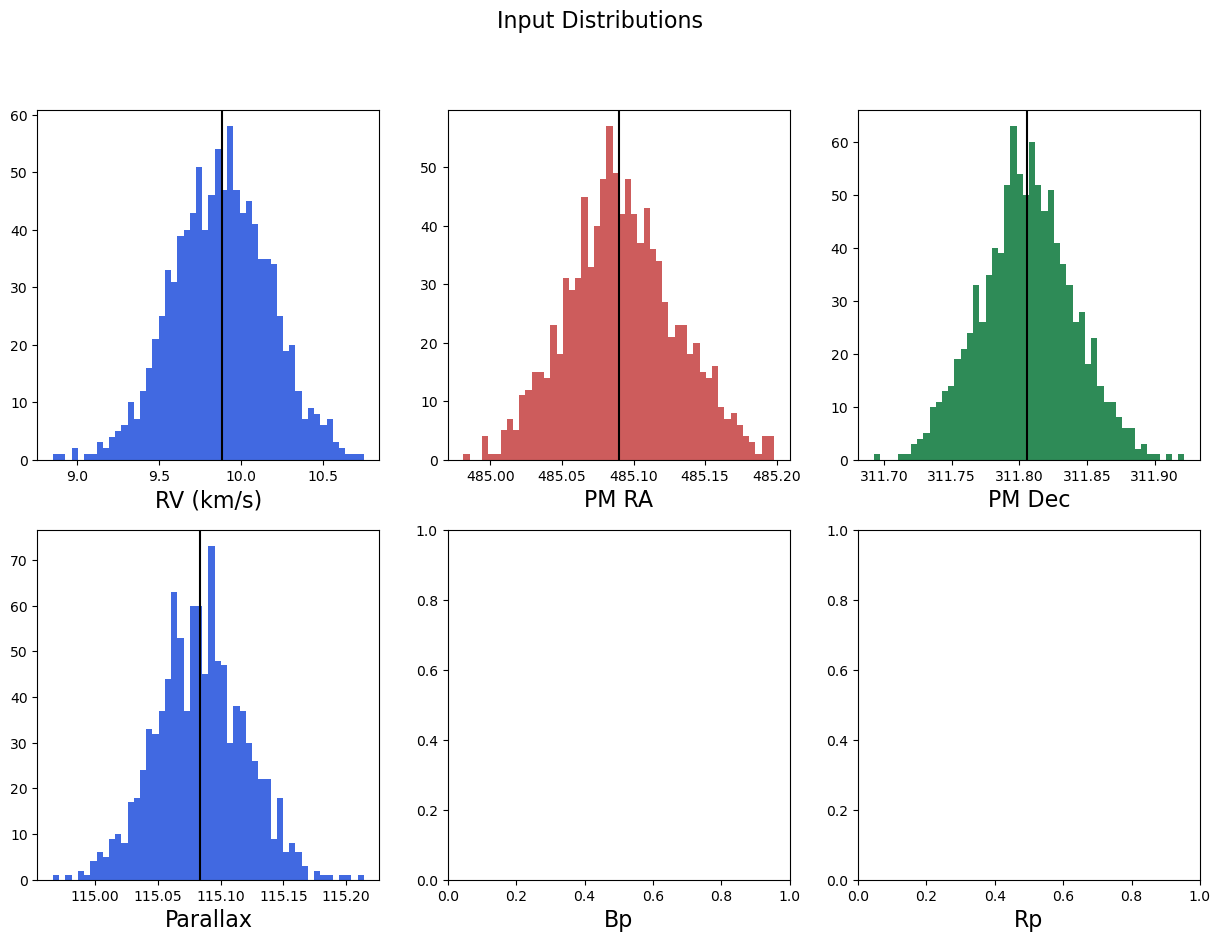

In [54]:
## plot the input arrays for GL710 to make sure we're using the right numbers

ID = int(np.where(source_idbd=='J0109-0343')[0])


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Input Distributions', fontsize=16)
ax1.hist(rv_array[ID,:],bins=50,color='royalblue')
ax2.hist(pmra_array[ID,:],bins=50,color='indianred')
ax3.hist(pmdec_array[ID,:],bins=50,color='seagreen')
ax4.hist(plx_array[ID,:],bins=50,color='royalblue')

ax1.axvline(np.median(rv_array[ID,:]),color='black')
ax2.axvline(np.median(pmra_array[ID,:]),color='black')
ax3.axvline(np.median(pmdec_array[ID,:]),color='black')
ax4.axvline(np.median(plx_array[ID,:]),color='black')

ax1.set_xlabel('RV (km/s)', fontsize=16)
ax2.set_xlabel('PM RA', fontsize=16)
ax3.set_xlabel('PM Dec', fontsize=16)
ax4.set_xlabel('Parallax', fontsize=16)
ax5.set_xlabel('Bp', fontsize=16)
ax6.set_xlabel('Rp', fontsize=16)

print("Parallax:")
print(np.median(plx_array[ID,:]))

In [55]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_arraybd = np.sqrt(pmra_arraybd**2+pmdec_arraybd**2)
vtan_arraybd = (c2/plx_arraybd)*pmtot_arraybd
vtot_arraybd = (np.sqrt(vtan_arraybd**2+rv_arraybd**2))





In [56]:
##### Caalculate the perihelion distance and perihelion time for our sample:


#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

print(plx_arraybd.shape)
print(rv_arraybd.shape)
print(vtot_arraybd.shape)
print(vtan_arraybd.shape)

## set up arrays for perihelion distance and time
t_perbd=plx_arraybd * 0
d_perbd=plx_arraybd * 0

for i in range(0,len(source_idbd)):
    t_perbd[i,:] = -c1*(1/plx_arraybd[i,:])*(rv_arraybd[i,:]/vtot_arraybd[i,:]**2)
    d_perbd[i,:] = 10**3*(1/plx_arraybd[i,:])*(vtan_arraybd[i,:]/vtot_arraybd[i,:])

#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

(136, 1000)
(136, 1000)
(136, 1000)
(136, 1000)


In [57]:
#Same as last time creates empty arrays from brown dwarf sample

high_d_bd_quantile = []
low_d_bd_quantile = []
for i in range(0,len(source_idbd)):
    highbd = np.quantile(d_perbd[i], [.95])
    lowbd = np.quantile(d_perbd[i], [.05])
    
    high_d_bd_quantile.append(highbd)
    low_d_bd_quantile.append(lowbd)

high_errbd = np.hstack(high_d_bd_quantile)
low_errbd = np.hstack(low_d_bd_quantile)


In [58]:
y_errbd = high_errbd - low_errbd

In [59]:

high_t_bd_quantile = []
low_t_bd_quantile = []
for i in range(0,len(source_idbd)):
    highbd = np.quantile(t_perbd[i], [.95])
    lowbd = np.quantile(t_perbd[i], [.05])
    
    high_t_bd_quantile.append(highbd)
    low_t_bd_quantile.append(lowbd)

th_errbd = np.hstack(high_t_bd_quantile)
tl_errbd = np.hstack(low_t_bd_quantile)

In [60]:
x_errbd = th_errbd - tl_errbd

In [61]:
rv[np.argsort(med_d_per)[0:10]]

array([ -14.419984817504883, -373.7366638183594  ,   26.75624656677246 ,
         82.47994995117188 ,  195.67918395996094 ,  -47.449195861816406,
       -264.4064636230469  ,  -82.91139221191406 ,   70.3505630493164  ,
        -37.17289733886719 ])

In [62]:
med_d_per[np.argsort(med_d_per)[0:10]]

array([0.051344245058617066, 0.10272502255483454 , 0.1518873359776375  ,
       0.25806495819814573 , 0.49434446958604056 , 0.49928990248381183 ,
       0.5401274267821454  , 0.5689537525736255  , 0.5977603346417015  ,
       0.6081530134210457  ])

In [63]:
## calculate medians: from brown dwarf sample
med_t_perbd = np.mean(t_perbd,axis=1)/10**6
med_d_perbd = np.mean(d_perbd,axis=1)
med_v_perbd = np.mean(vtot_arraybd,axis=1)

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_949/3011284750.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_perbd[np.argsort(med_d_perbd)[0:25]], med_d_perbd[np.argsort(med_d_perbd)[0:25]], y_errbd[np.argsort(med_d_perbd)[0:25]], x_errbd[np.argsort(med_d_perbd)[0:25]]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


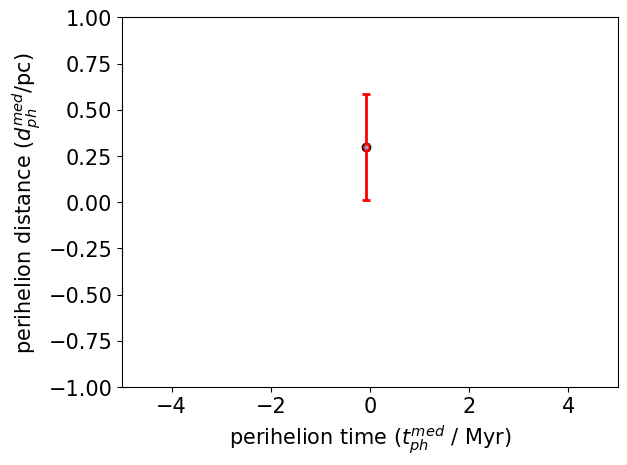

In [64]:
plt.scatter(med_t_perbd[np.argsort(med_d_perbd)[0:25]], med_d_perbd[np.argsort(med_d_perbd)[0:25]], facecolor = 'red', edgecolor = 'black')
plt.errorbar(med_t_perbd[np.argsort(med_d_perbd)[0:25]], med_d_perbd[np.argsort(med_d_perbd)[0:25]], y_errbd[np.argsort(med_d_perbd)[0:25]], x_errbd[np.argsort(med_d_perbd)[0:25]]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(-1,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

A brown dwarf in our very own solar system??????
The lower limit of the source is NAN this is more than likely a computational error but still worth the follow up.

In [65]:
#rv of brown dwrf
rvbd[135]

-3.3

In [66]:
#error of brown dwarf
rv_ebd[135]

0.4

In [67]:
PMDbd[135]

nan

In [68]:
high_errbd

array([13.708027064033764 ,  5.467672562505874 ,  9.07025643308614  ,
        5.024412683442896 , 15.690709632795494 , 15.343634897588363 ,
        8.605883965439775 , 16.51101955305033  ,  7.301966945589872 ,
       12.516112495110242 , 13.970940623549016 ,  9.850811859536654 ,
       14.235775190697895 , 15.011035791121094 , 14.665225093892957 ,
       14.482515830153535 , 10.247340177233093 , 17.643833189237306 ,
       13.800367645655296 , 13.39680561536815  , 10.045915090311643 ,
       11.306896472368786 , 18.218783603657382 , 15.169361980267778 ,
        9.16055188587845  , 16.976633811810455 , 16.22048289410476  ,
       18.480867586717796 ,  8.904561555585493 , 12.837460853358325 ,
       16.901158697904904 , 15.016905976064677 ,  8.308997046125322 ,
        4.635120665851605 , 17.31864566589434  , 11.744254989253657 ,
       18.84622433521771  ,  6.6149752963995185,  8.534711900786235 ,
        7.682920395073971 ,  6.818141842178912 , 19.146407721843858 ,
       17.9765609075

In [69]:
x_errbd

array([   6272.253168483323   ,    2537.7574739758857  ,
         53498.505778027466   ,   23271.4208090748     ,
         16181.427514180075   ,   11465.551498058667   ,
          4344.910170600342   ,   11516.091151117042   ,
           396.41374387580436 ,    1136.2642389351386  ,
         11698.114755570045   ,     480.26241992284486 ,
          1510.2200265860301  ,    8604.69893429859    ,
        246696.256674561      ,    3991.8193199721572  ,
          8141.028699146933   ,   13294.168360927404   ,
           521.7873635582437  ,     655.0694147671493  ,
         79292.30335717753    ,    1735.413833987739   ,
           922.988336558803   ,    6614.552877756505   ,
           484.5364529899671  ,    3162.839177459704   ,
          2312.445447291946   ,   27856.549334378127   ,
          2666.6932412530296  ,    2435.7876482404536  ,
         13500.925407723378   ,   23045.012494437164   ,
           108.5837995451584  ,   24771.628674604348   ,
          8219.160647295852   ,

In [70]:
source_idbd[np.argsort(med_d_perbd)[0:10]]

array(['J0720-0846', 'J0253+1652', 'J0435-1606', 'J1845-6357B',
       'J1048-3956', 'J0429-3123A', 'J0255-4700', 'J0835-0819',
       'J0746+2000', 'J2057-0252'], dtype='<U11')

In [71]:
[np.argsort(med_d_perbd)[0:10]]

[array([130,  71, 113, 110, 119,  78,  69,  60,   3,  33])]

### Ta dah! Now we have calculated the perihelion distance and times for all the stars in our sample

### Next we need to estimate masses for everything so that we can calculate impulses for each target:

In [72]:
def value(s):
    try:
        return float(s)
    except ValueError:
        return 0

In [73]:
## Read in Bp-Rp from Mamajek file.
M_bprp = np.loadtxt('/Users/edm/Desktop/Stellar Flybys/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt', usecols=(11), comments='#', dtype='str',  converters={11: value})
M_bprp = M_bprp.astype('float64')
print(len(M_bprp))

## read in mass from Mamajek file
M_mass = np.loadtxt('/Users/edm/Desktop/Stellar Flybys/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(30), comments='#',dtype='str',  converters={30: value})
M_mass = M_mass.astype('float64')
print(len(M_mass))

## read in teff from Mamajek file
M_teff = np.loadtxt('/Users/edm/Desktop/Stellar Flybys/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(1), comments='#',dtype='str',  converters={1: value})
M_teff = M_teff.astype('float64')
print(len(M_teff))


118
118
118


In [74]:
M_mass=M_mass[6:87]
M_teff=M_teff[6:87]
M_bprp=M_bprp[6:87]

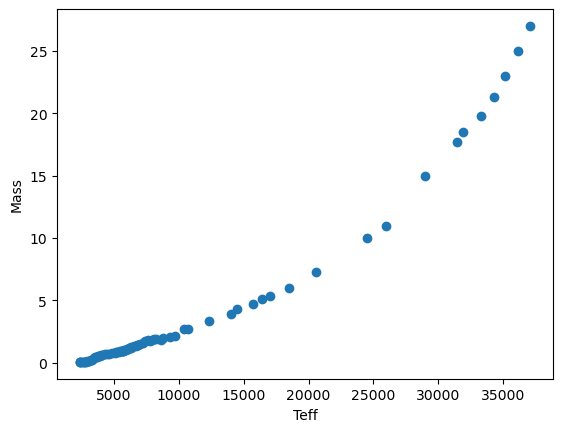

In [75]:
#concatanating 1d arrays code does not iterate over float
#scatter = plt.scatter(new_data2,new_data)

scatter = plt.scatter(M_teff,M_mass)
plt.xlabel('Teff')
plt.ylabel('Mass')
plt.show()




Text(0, 0.5, 'Teff')

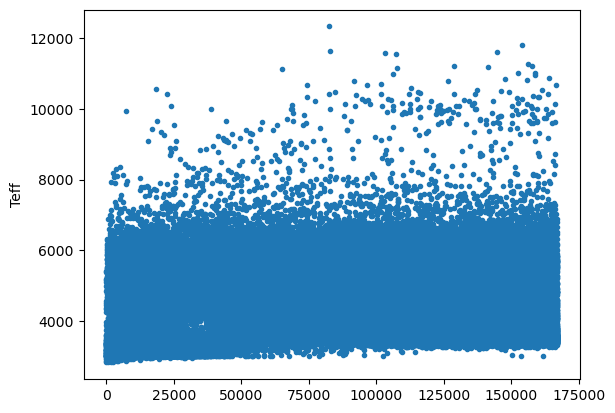

In [76]:
## plot Gaia teff values to understand their range etc.

plt.plot(teff,marker='.',linestyle='None')
plt.ylabel('Teff')

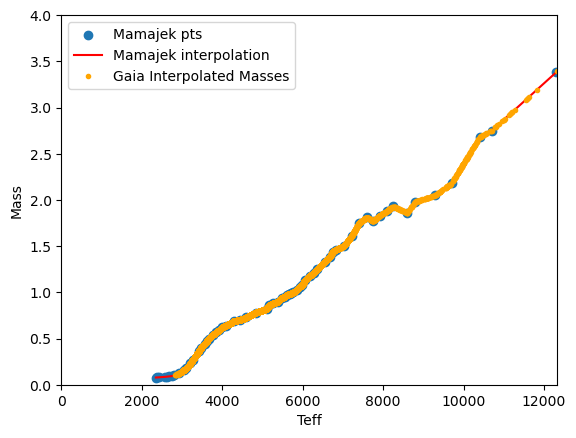

In [77]:
## use interpolation to figure out the match between T and M

f = interpolate.interp1d(M_teff,M_mass)
#top_press_P1 - top_press_P2


#xnew = np.log10(top_press_P1)
new_mass=f(M_teff)


scatter = plt.scatter(M_teff,M_mass,label='Mamajek pts')
plt.plot(M_teff,f(M_teff),color='red',label='Mamajek interpolation')
plt.plot(teff,f(teff),color='orange',label='Gaia Interpolated Masses',linestyle='None',marker='.')
plt.xlabel('Teff')
plt.ylabel('Mass')
plt.legend()
plt.ylim(0,4)
plt.xlim(0,max(teff))
plt.show()



In [78]:
## use interpolated function to calculate masses from temperatures:
Mass = f(teff)




In [79]:
Bp_Rp.shape

(167021,)

In [80]:
## Gliese 710 doesn't have a teff, so therefore the mass
G710 = np.where(source_id==4270814637616488064)


print(Mass[G710])
print(teff[G710])
print((Bp_Rp[G710]))
#print(Bp_Rp.shape)

[nan]
[nan]
[1.6937250000000006]


In [81]:
print(np.count_nonzero(np.isnan(Mass)))

print(np.count_nonzero(np.isnan((Bp_Rp))))

## ok there are a lot of nans!!! for objects with nan Teff values, use Bp_Rp to calculate Mass




73614
1513


In [82]:
## have to trim arrays again because BP_Rp has zeros at beginning

M_bprp=M_bprp[18:]
M_teff=M_teff[18:]
M_mass=M_mass[18:]

nans = np.where(np.isnan(teff))


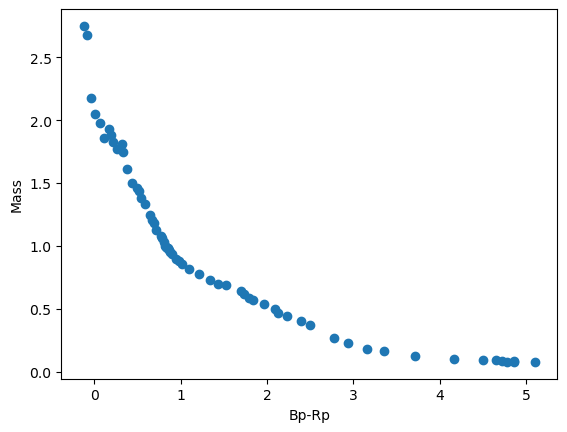

2.75


In [83]:
### do the same interpolation with Bp_Rp for objects with nans:

scatter = plt.scatter(M_bprp,M_mass)
plt.xlabel('Bp-Rp')
plt.ylabel('Mass')
plt.show()

print(max(M_mass))


In [84]:
#interpolation will only work where Bp_Rp is within range of Mamajek values, so remove any

print(min(Bp_Rp))
print(min(M_bprp))



nans_bprp = np.where((np.isnan(teff)) & (Bp_Rp > min(M_bprp)))
#print(nans_bprp)

-0.47897249999999936
-0.12


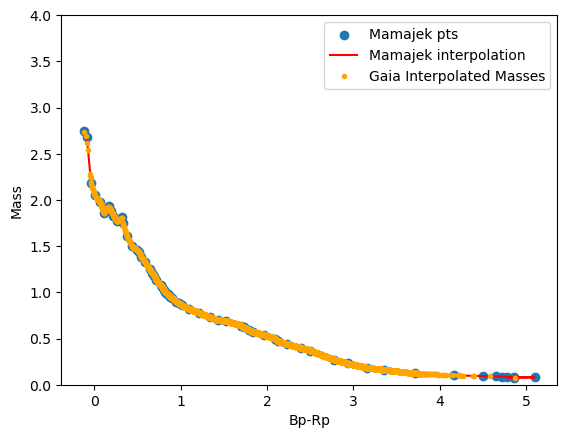

In [85]:
## use interpolation to figure out the match between T and M

f2 = interpolate.interp1d(M_bprp,M_mass)
#top_press_P1 - top_press_P2


#xnew = np.log10(top_press_P1)
#new_mass=f2(M_bprp)


scatter = plt.scatter(M_bprp,M_mass,label='Mamajek pts')
plt.plot(M_bprp,f2(M_bprp),color='red',label='Mamajek interpolation')
plt.plot(Bp_Rp[nans_bprp],f2(Bp_Rp[nans_bprp]),color='orange',label='Gaia Interpolated Masses',linestyle='None',marker='.')
plt.xlabel('Bp-Rp')
plt.ylabel('Mass')
plt.legend()
plt.ylim(0,4)
#plt.xlim(0,max(bprp))
plt.show()





Mass[nans_bprp] = f2(Bp_Rp[nans_bprp])



In [86]:
## How many objects without masses are left???

print(np.count_nonzero(np.isnan(Mass)))
print(Mass[G710])

1515
[0.6418455882352939]


In [87]:
Mass[167020] # mass of the brown dwarf system in kilograms

0.07808660833333333

In [88]:
#np.argmax(y_err[np.argsort(med_d_per)[0:10]])

In [89]:
np.where(y_err == 4.9858768445550385)

(array([], dtype=int64),)

In [90]:
### calculate impulses for each target using the median values for t_per, d_per and v_per:

## set up impulse arrays:
impulse1 = np.zeros(len(source_id))
impulse2 = impulse1 * 0


## calculate impulse values:
for i in range(0,len(source_id)):
    impulse1[i] = Mass[i]/(med_d_per[i]*med_v_per[i])



In [91]:
impulse1bd = Massbd/(med_d_perbd*med_v_perbd)

In [92]:
### calculate impulses for each target using the median values for t_per, d_per and v_per:
### Distant tide approximation
## set up impulse arrays:
impulse3 = np.zeros(len(source_id))
impulse4 = impulse3 * 0

med_d_per2 = med_d_per**2

## calculate impulse values:
for i in range(0,len(source_id)):
    impulse3[i] = Mass[i]/(med_d_per2[i]*med_v_per[i])

In [93]:
BD_t = (-c1*(1/BD_plx)*(BD_rv/BD_vtot_array**2))
BD_d = 10**3*(1/BD_plx)*(BD_vtan_array/BD_vtot_array)

In [94]:
med_d_per[167020]

1.4714300427527744

In [95]:
med_t_per[167020]

0.20891218886159454

In [96]:
impulse1[167020]

0.00123687197955404

In [97]:
BD_MASS = (20.38*np.exp(-2.92*BD_Bp_Rp) + .48)

In [98]:
BD_abs_mag = 18.353840 + 5*(np.log10(BD_plx))
BD_abs_mag

28.515674468598334

In [99]:
np.argmax(y_err)

164106

In [100]:
source_id[161120]

5.49043801081691e+18

In [101]:
source_id[np.argsort(med_d_per)[0:10]]

array([4.2708146376164879e+18, 5.5447439252126484e+18,
       5.1091161856923904e+17, 5.5712321180900823e+18,
       9.2978837150881229e+17, 3.3721040352754831e+18,
       4.1164513783889516e+18, 1.9528024699185544e+18,
       3.0545094100986721e+18, 3.6003380819859978e+18])

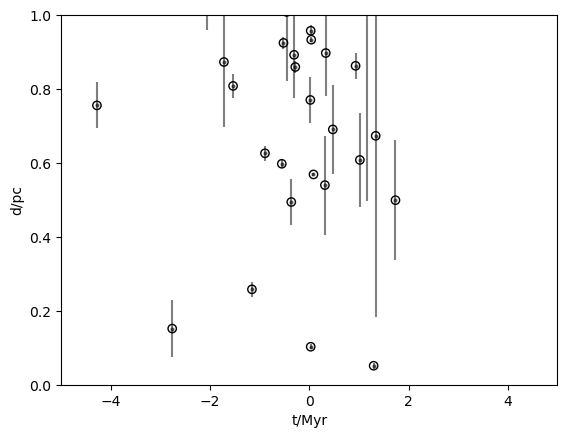

In [102]:
plt.scatter(med_t_per[np.argsort(med_d_per)[0:30]], med_d_per[np.argsort(med_d_per)[0:30]], facecolor = 'none', edgecolor = 'black')
plt.errorbar(med_t_per[np.argsort(med_d_per)[0:30]], med_d_per[np.argsort(med_d_per)[0:30]], y_err[np.argsort(med_d_per)[0:30]], alpha = .5, ecolor='black', fmt='ko', markersize = 2)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("t/Myr")
plt.ylabel("d/pc")
plt.show()

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_949/1711868614.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = '+')


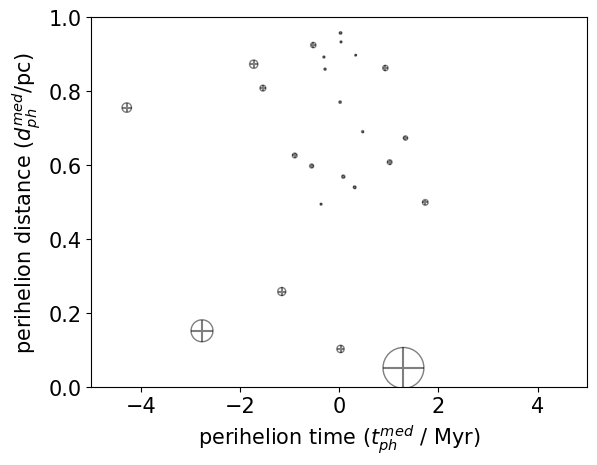

In [103]:

plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'none', edgecolor = 'black')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = '+')

ymin, ymax = plt.ylim(0,1)
xmin, xmax = plt.xlim(-5,5)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('DR3_StellarEncounters(noBD)_with_impulse.png', bbox_inches = "tight", facecolor='White')


plt.show()

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_949/3976473593.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_per[med_d_per <= 1], med_d_per[med_d_per <= 1], y_err[med_d_per <= 1], x_err[med_d_per <= 1]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)
/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_949/3976473593.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_perbd[med_d_perbd <= 1], med_d_perbd[med_d_perbd <= 1], y_errbd[med_d_perbd <= 1], x_errbd[med_d_perbd <= 1]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


(array([0.                , 0.2               , 0.4               ,
        0.6000000000000001, 0.8               , 1.                ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

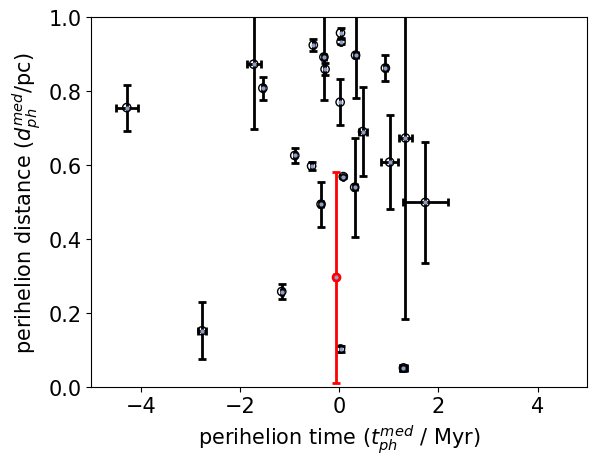

In [104]:
plt.scatter(med_t_per[med_d_per <= 1], med_d_per[med_d_per < 1], facecolor = 'none', edgecolor = 'black')
plt.errorbar(med_t_per[med_d_per <= 1], med_d_per[med_d_per <= 1], y_err[med_d_per <= 1], x_err[med_d_per <= 1]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

plt.scatter(med_t_perbd[med_d_perbd <= 1], med_d_perbd[med_d_perbd <= 1], facecolor = 'red', edgecolor = 'red')
plt.errorbar(med_t_perbd[med_d_perbd <= 1], med_d_perbd[med_d_perbd <= 1], y_errbd[med_d_perbd <= 1], x_errbd[med_d_perbd <= 1]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.savefig('DR3_StellarEncounters_no_impulse.png', bbox_inches = "tight", facecolor='White')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [105]:
np.argmin(med_d_perbd)

135

In [106]:
y_errbd[135]

nan

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_8051/722638104.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(med_t_per, med_d_per, s = 500*impulse3, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')


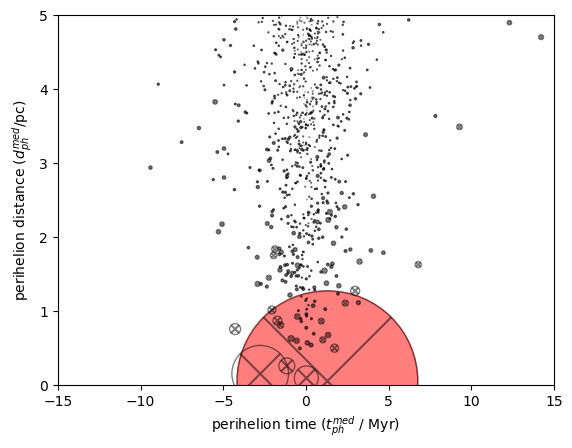

In [124]:

plt.scatter(med_t_per[1561], med_d_per[1561], s = 1000*impulse3[1561], alpha = .5, facecolor = 'red', edgecolor = 'red')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse3, alpha = .5, facecolor = 'none', edgecolor = 'black')
plt.scatter(med_t_per, med_d_per, s = 500*impulse3, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')

xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")
plt.show()

In [107]:
### Read in data file

GSample1bd = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/Mass Bd sampls (dino).fits')
GSample_A2bd = Table(GSample1bd[1].data)

In [108]:
## pull out variables on interest

#radial velocity
Rvelbd = np.asarray(GSample_A2bd["RV"])
rvbd=Rvelbd

rv_ebd = np.asarray(GSample_A2bd["e_RV"]) 


# PM RA and Dec
bdPMD = np.asarray(GSample_A2bd['pmDE'])
bdPMR = np.asarray(GSample_A2bd['pmRA'])
bdPMR_e = np.asarray(GSample_A2bd['e_pmRA'])
bdPMD_e = np.asarray(GSample_A2bd['e_pmDE'])

#parallax
bdplx = 1000/np.asarray(GSample_A2bd['Dist'])
bdplx_e = 1/np.asarray(GSample_A2bd['e_Dist'])

bdMass = np.asarray(GSample_A2bd['Mass'])

In [109]:
#uses new median values for the arrays
BD1_pmtot_array = np.sqrt(bdPMR**2+bdPMD**2)
BD1_vtan_array = (4.74/bdplx)*BD1_pmtot_array
BD1_vtot_array = (np.sqrt(BD1_vtan_array**2+rvbd**2))
c1 = 0.9779*10**9
c2 = 4.74047

In [110]:
BD_t = (-c1*(1/bdplx)*(rvbd/BD1_vtot_array**2))
BD_d = 10**3*(1/bdplx)*(BD1_vtan_array/BD1_vtot_array)

In [129]:
BDimpulse1 = bdMass/(BD_d**2*BD1_vtot_array)

In [130]:
BDimpulse1

array([0.000006316948239213683 , 0.0000784500248860616   ,
       0.00008174601763385572  , 0.00007704431419444675  ,
       0.00002019134203277823  , 0.000012473381203045178 ,
       0.00002368416810290589  , 0.000003380178883177639 ,
       0.000014081101841690918 , 0.000010935345509979962 ,
       0.000004117332957855682 , 0.000013882048776705606 ,
       0.000009213751352529594 , 0.000017178002302430935 ,
       0.000035161313218886325 , 0.0000079719669715571   ,
       0.000026346351099323888 , 0.000011829208494316138 ,
       0.00000384622056441071  , 0.000005102925458366269 ,
       0.000029874447689535548 , 0.000018765808663958923 ,
       0.0000022866519054240357, 0.000012349816956868921 ,
       0.000021076779151196025 , 0.000006149843270391874 ,
       0.000004867931597160115 , 0.000015536107700829122 ,
       0.00005504377417998928  , 0.000004838109447576487 ,
       0.000005058965101119635 , 0.000012557148523064094 ,
       0.000016753778954854196 , 0.00013776085652177664 

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_8051/4276227847.py:2: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(BD_t/10**6, BD_d, s = 500*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_8051/4276227847.py:5: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(med_t_per, med_d_per, s = 500*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')


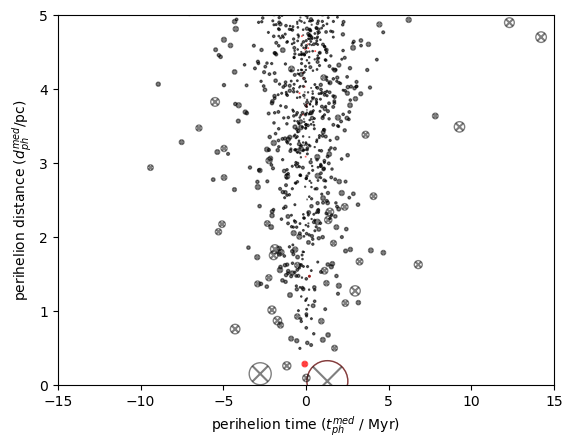

In [131]:

plt.scatter(BD_t/10**6, BD_d, s = 1000*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red')
plt.scatter(BD_t/10**6, BD_d, s = 500*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
plt.scatter(med_t_per[1561], med_d_per[1561], s = 1000*impulse1[1561], alpha = .5, facecolor = 'none', edgecolor = 'red')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'none', edgecolor = 'black')
plt.scatter(med_t_per, med_d_per, s = 500*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')
plt.scatter(med_t_per[167020], med_d_per[167020], s = 1000*impulse1[167020], alpha = .5, facecolor = 'none', edgecolor = 'red')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")
plt.show()

In [132]:
GSample_A2.loc[np.argsort(med_d_per)[0:10]]

SOURCE_ID_1        RA_1  RA_ERROR_1      DEC_1  DEC_ERROR_1  \
1561    4.270815e+18  274.961836    0.015334  -1.938613     0.014947   
297     5.544744e+18  123.112418    0.011395 -35.495498     0.012950   
82647   5.109116e+17   20.131652    0.019577  61.882522     0.023607   
157816  5.571232e+18   92.731033    0.007669 -42.767608     0.008156   
75027   9.297884e+17  121.370997    0.039397  46.414377     0.041631   
106351  3.372104e+18   97.048310    0.032780  18.753581     0.029152   
108983  4.116451e+18  265.060028    0.194591 -23.631461     0.185993   
82      1.952802e+18  326.592882    0.012875  38.217517     0.015297   
14196   3.054509e+18  113.662903    0.018987  -6.620059     0.017451   
12742   3.600338e+18  177.905983    0.065506  -3.229237     0.044839   

        PARALLAX_1  PARALLAX_ERROR_1      PMRA_1  PMRA_ERROR_1     PMDEC_1  \
1561     52.396292          0.017110   -0.414064      0.019433   -0.108475   
297      89.506426          0.015486  -65.479450      0.016051  -29.204494   
82647    13.211847          0.032222    0.144110      0.024205    0.009536   
157816   10.233998          0.008584    0.094018      0.009573    0.461372   
75027    13.697730          0.058559   -2.042765      0.053222    3.232414   
106351   11.978683          0.035356    0.557251      0.043406    0.437544   
108983   11.865456          0.331267   -2.101781      0.226236    3.654766   
82      141.894606          0.021211  161.453676      0.017374 -119.739402   
14196    24.962767          0.023380    0.630440      0.023150    5.492874   
12742    25.909089          0.084700   -3.174653      0.111489   -0.316779   

        ...      pmra_2     pmdec_2  phot_g_mean_mag_2  phot_bp_mean_mag_2  \
1561    ...   -0.414064   -0.108475           9.063088            9.876450   
297     ...  -65.479450  -29.204494          14.346308           14.605364   
82647   ...    0.144110    0.009536           8.891319            9.184629   
157816  ...    0.094018    0.461372          11.781880           12.445622   
75027   ...   -2.042765    3.232414          15.833971           17.735775   
106351  ...    0.557251    0.437544          15.307603           16.715168   
108983  ...   -2.101781    3.654766          15.803320           16.424961   
82      ...  161.453676 -119.739402          10.830858           12.417838   
14196   ...    0.630440    5.492874          12.399770           13.790565   
12742   ...   -3.174653   -0.316779          14.187830           15.767920   

        phot_rp_mean_mag_2  radial_velocity  radial_velocity_error  \
1561              8.182725       -14.419985               0.256310   
297              13.921870      -373.736664               8.178549   
82647             8.420246        26.756247               0.214011   
157816           10.952689        82.479950               0.417643   
75027            14.538828       195.679184               6.608191   
106351           14.143302       -47.449196               3.735226   
108983           14.521918      -264.406464               5.506846   
82                9.603650       -82.911392               0.177331   
14196            11.235546        70.350563               0.350941   
12742            12.962525       -37.172897               1.946658   

        rv_template_teff  teff_gspphot    vbroad  
1561              3900.0           NaN       NaN  
297               6000.0           NaN       NaN  
82647             5750.0   5816.251465  7.023154  
157816            4500.0   4554.233887       NaN  
75027             3400.0           NaN       NaN  
106351            3500.0   3461.470459       NaN  
108983            5500.0           NaN       NaN  
82                3600.0           NaN  5.071913  
14196             3500.0           NaN  8.539066  
12742             3300.0           NaN       NaN  

[10 rows x 93 columns]

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_8051/2177424137.py:2: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(med_t_per[167020], med_d_per[167020], s = 10000*impulse3[167020], alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_8051/2177424137.py:4: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(BD_t/10**6, BD_d, s = 500*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')


(array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 [Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

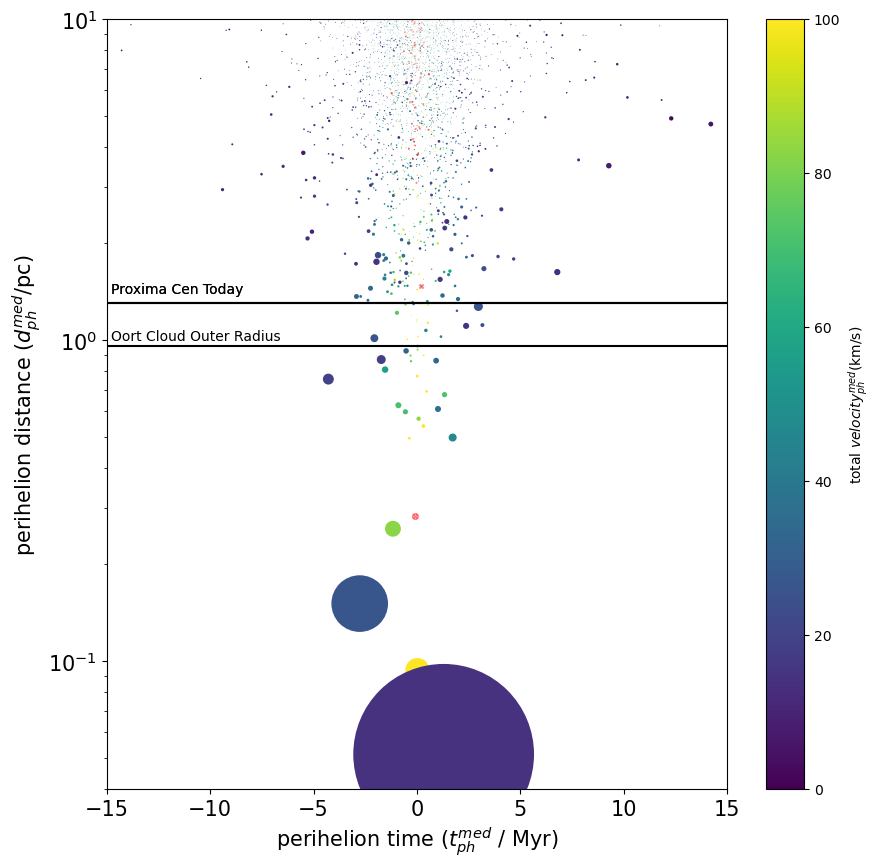

In [133]:

plt.figure(figsize=(10, 10))
plt.scatter(med_t_per[167020], med_d_per[167020], s = 10000*impulse3[167020], alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
plt.scatter(BD_t/10**6, BD_d, s = 1000*BDimpulse1, alpha = .5, facecolor = 'none', edgecolor = 'red')
plt.scatter(BD_t/10**6, BD_d, s = 500*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse3, alpha = 1, edgecolor = 'none', facecolor = 'none', c = med_v_per, vmin=0, vmax=100, cmap='viridis')

plt.plot(np.arange(-20,20,1), np.zeros(40)+med_d_per[0],color='black')
plt.text(-14.8,1,'Oort Cloud Outer Radius')
plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black')
plt.text(-14.8,1.4,'Proxima Cen Today')
plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black')
plt.text(-14.8,1.4,'Proxima Cen Today')
cbartitle = plt.colorbar()
cbartitle.set_label('total $velocity^{med}_{ph}$(km/s)')

xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0.04,10)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)
plt.yscale('log')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# current top 10 stars on plot now.
# 


### Done!!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


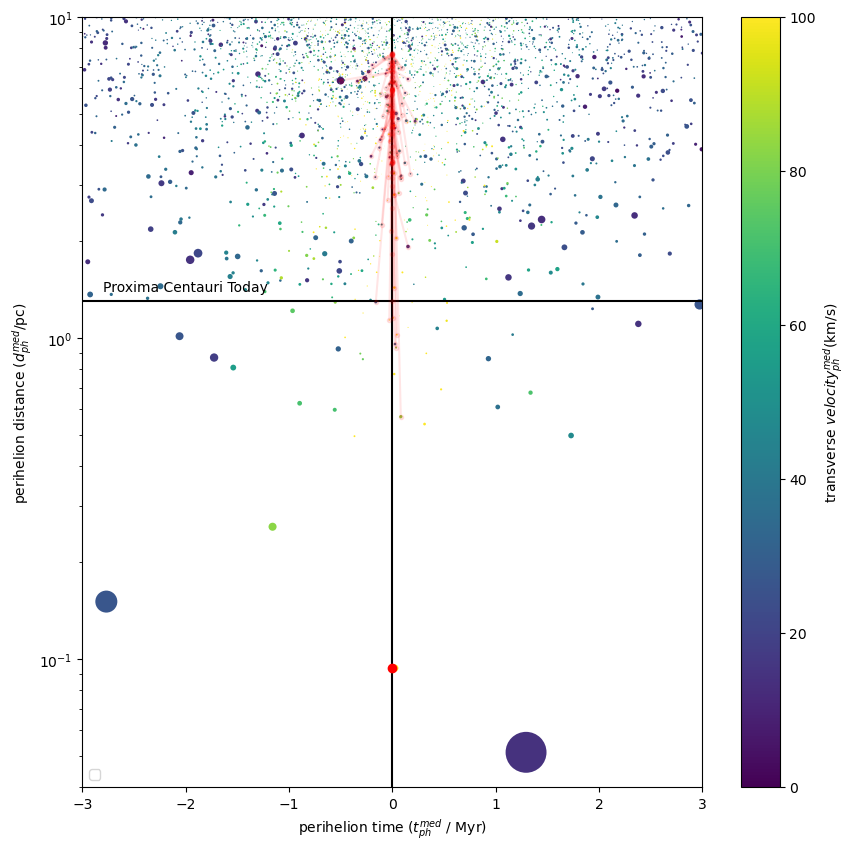

In [134]:
#### overplot an object of interest if you know the Gaia DR3 ID

#object_of_interest = np.where(source_id==5853498713190525696)

plt.figure(figsize=(10, 10))


plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black')
plt.plot(np.zeros(100), np.arange(0,100),color='black')

plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = 1, edgecolor = 'none', facecolor = 'none', c = med_v_per, vmin=0, vmax=100, cmap='viridis')
#plt.scatter(t[0]/10**6, d[0], s = 1000*area[0], alpha = 1, edgecolor = 'none', facecolor = 'none', c = 'green')
plt.plot(med_t_per[object_of_interest]/10**6, med_d_per[object_of_interest],marker='o',color='red')


plt.text(-2.8,1.4,'Proxima Centauri Today')

for i in range(0,100):
    plt.plot([0, med_t_per[np.argsort(-1*plx)[i]]], [1/(plx[np.argsort(-1*plx)[i]]/1000),med_d_per[np.argsort(-1*plx)[i]]],marker='.',color='red',alpha=0.1,linestyle='-')

    
    1/(plx[np.argsort(-1*plx)[0:10]]/1000)


cbartitle = plt.colorbar()
cbartitle.set_label('transverse $velocity^{med}_{ph}$(km/s)')
#plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-3,3)
ymin, ymax = plt.ylim(0.04,10)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")
plt.yscale('log')
#plt.xscale('log')
plt.legend()



In [135]:
med_d_per[1561]

0.051267669906258806

In [136]:
source_id[167020]

1.2271336990537344e+18

In [137]:
med_t_per[1561]

1.2946873043919418

<Figure size 200x200 with 0 Axes>

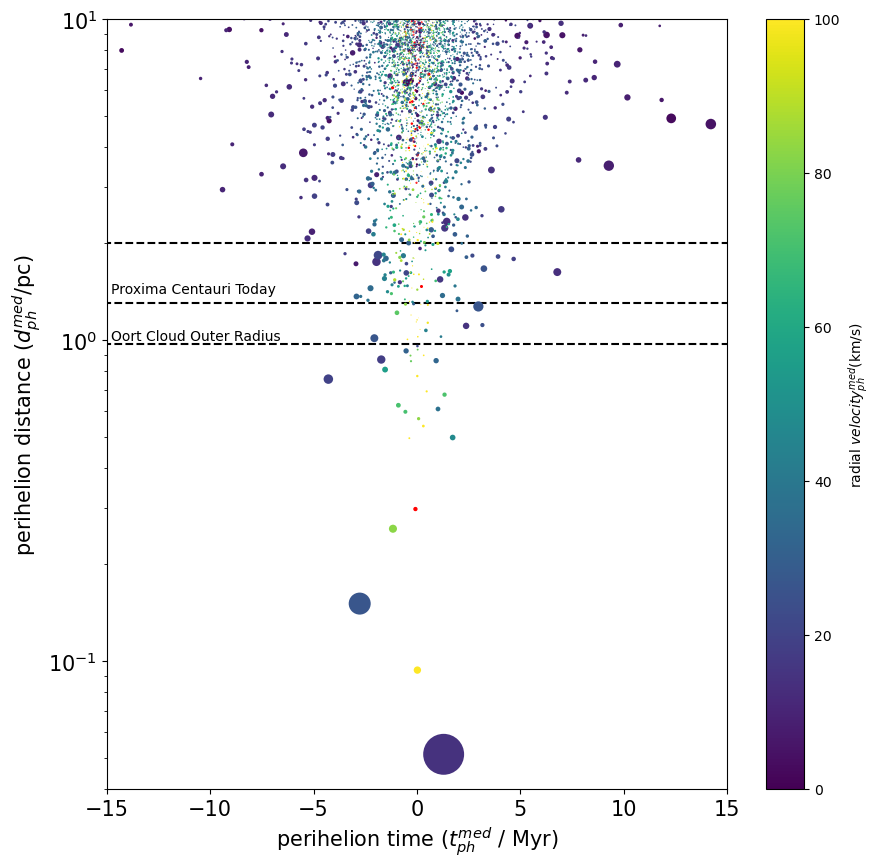

In [138]:
#### overplot an object of interest if you know the Gaia DR3 ID

#object_of_interest = np.where(source_id==5544743925212648320)

fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#area = (Mass)/(d*vtot)

plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black',linestyle='dashed',zorder=0)
plt.plot(np.arange(-20,20,1), np.zeros(40)+0.969627362,color='black',linestyle='dashed',zorder=0)
plt.plot(np.arange(-20,20,1), np.zeros(40)+2,color='black',linestyle='dashed',zorder=0)
#plt.plot(np.zeros(100), np.arange(0,100),color='black',linestyle='dashed',zorder=0)


#plt.gca().add_patch(Rectangle((-0.5,1),1,3,fill=False, color='black', linestyle = 'solid'))
#plt.annotate("J1416AB", (4.85,0.0512), color='black', weight='bold', fontsize=10, ha='center', va='center')
plt.scatter(med_t_perbd, med_d_perbd, s = 1000*impulse1bd, facecolor = 'red', edgecolor = 'red')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = 1, edgecolor = 'none', facecolor = 'none', c = np.abs(rv), vmin=0, vmax=100, cmap='viridis')
plt.scatter(med_t_per[167020], med_d_per[167020], s = 1000*impulse1[167020], alpha = 1, edgecolor = 'red', facecolor = 'none', c = np.abs(rv[167020]), vmin=0, vmax=100, cmap='viridis', marker = 'X')
#plt.scatter(t[0]/10**6, d[0], s = 1000*area[0], alpha = 1, edgecolor = 'none', facecolor = 'none', c = 'green')
#plt.plot(t[object_of_interest]/10**6, d[object_of_interest],marker='o',color='red')


plt.text(-14.8,1.4,'Proxima Centauri Today')
plt.text(-14.8,1,'Oort Cloud Outer Radius')

COLOR = 'black'
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

cbartitle = plt.colorbar()
cbartitle.set_label('radial $velocity^{med}_{ph}$(km/s)')
#plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0.04,10)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)
plt.yscale('log')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xscale('log')
#plt.legend()
plt.savefig('DR3_StellarEncounters(logscale).png', bbox_inches = "tight", dpi=300, facecolor='White')



In [139]:
med_d_per[object_of_interest]

array([0.09378250354184176])

In [140]:
#source_id = np.asarray(GSample_A["source_id_2"])
source_id[np.argsort(med_d_per)[0:20]]

array([4.2708146376164879e+18, 5.5447439252126484e+18,
       5.1091161856923904e+17, 5.5712321180900823e+18,
       9.2978837150881229e+17, 3.3721040352754831e+18,
       4.1164513783889516e+18, 1.9528024699185544e+18,
       3.0545094100986721e+18, 3.6003380819859978e+18,
       5.2615938081659750e+18, 4.5366731819552532e+18,
       3.9849696562517722e+17, 5.4331295406329784e+18,
       3.3201842028564357e+18, 1.7916178491544346e+18,
       5.3460076752226673e+18, 3.2600792279255644e+18,
       6.2240873892692634e+18, 5.5539581762394952e+18])

In [141]:
source_id[np.argsort(-1*impulse1)[0:10]]

array([4.2708146376164879e+18, 5.1091161856923904e+17,
       3.4484106576392980e+18, 6.1505825974064384e+18,
       3.4484579323411251e+18, 4.4544107799777966e+18,
       5.4698028962790298e+18, 5.4331295406329784e+18,
       3.2970073567367660e+18, 5.3752262733159936e+18])

In [142]:
impulse1[np.argsort(-1*impulse1)[0:10]]

array([0.8682109261623558  , 0.2512601246482563  , 0.05779002910874427 ,
       0.05591217322007105 , 0.055504166133341984, 0.05444756595862685 ,
       0.04898576985799221 , 0.046941560949414936, 0.04367798678208143 ,
       0.04327014280175407 ])

## Brown Dwarf check 
These next cells are to check the value of index 135 when you look at its missing values on simbad

In [114]:
#uses new median values for the arrays
BDpmtot_check = np.sqrt((-414.209)**2+(-1041.278)**2)
BD1_vtan_array_check = (4.74/47.1264)*BDpmtot_check
BD1_vtot_array_check = (np.sqrt(BD1_vtan_array_check**2+rvbd[135]**2))
c1 = 0.9779*10**9
c2 = 4.74047

In [115]:
BD_t_check = (-c1*(1/47.1264)*(rvbd[135]/BD1_vtot_array_check**2))
BD_d_check = 10**3*(1/47.1264)*(BD1_vtan_array_check/BD1_vtot_array_check)

In [117]:
BD_d_check

21.210440180220075

In [119]:
BD_t_check/10**6

0.005385342857889192

The new values used from simbad put the brown dwarf J1331-0116 at least twice the distance its original value was. This, therefore proves that J1331 is not a stellar flyby and the sample from Dino does not give us any stellar flybys.

In [ ]:
###

In [143]:
### load in mags for col-mag diagram

phot_g_mean_mag = np.asarray(GSample_A2["phot_g_mean_mag_2"])
phot_bp_mean_mag = np.asarray(GSample_A2["phot_bp_mean_mag_2"])
phot_rp_mean_mag = np.asarray(GSample_A2["phot_rp_mean_mag_2"])
parallax = np.asarray(GSample_A2["parallax_2"])


bp_rp = phot_bp_mean_mag - phot_rp_mean_mag
abs_mag = phot_g_mean_mag + 5*(np.log10(parallax)) - 10

In [144]:
max(phot_g_mean_mag)

18.35384

In [145]:
phot_rp_mean_mag[167020]

16.681887

In [146]:
abs_mag[167020]

18.515674468598334

In [147]:
abs_mag[1561]

7.659591194361543

In [148]:
phot_bp_mean_mag[1561]

9.876449584960938

In [149]:
bp_rp[167020]

4.870393

<Figure size 200x200 with 0 Axes>

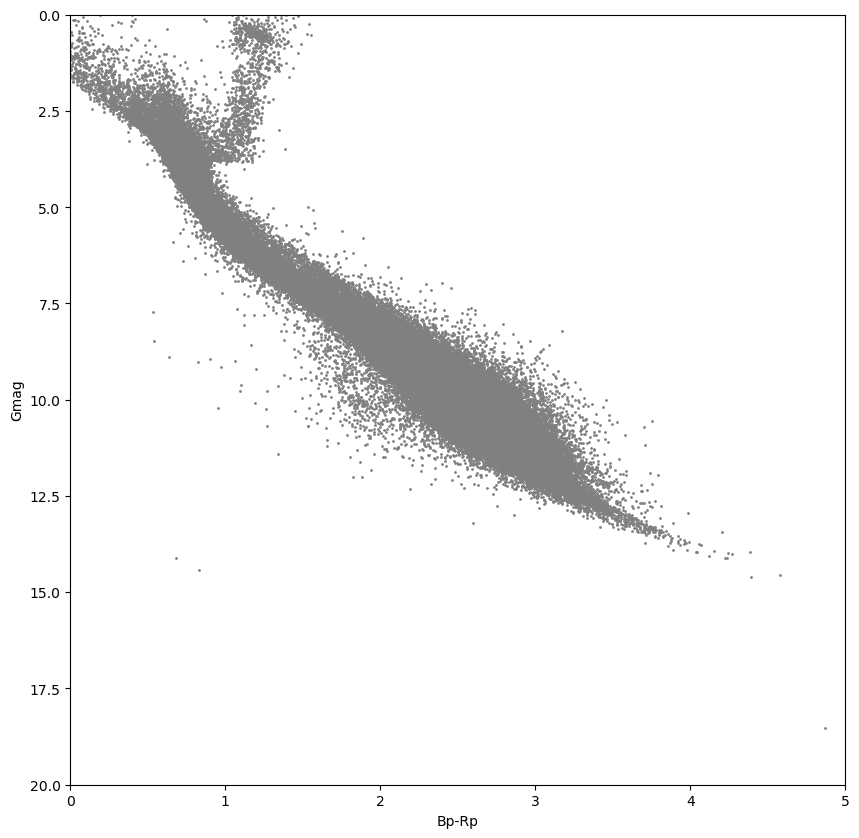

In [150]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))
#plots other stars in HR Diagram
plt.scatter(bp_rp,abs_mag, s = 1, color = 'grey')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle.set_label('Impulse')
plt.ylim(20,0)
plt.xlim(0,5)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

plt.show()
#solid bocks indicates the brown dwarf

<Figure size 200x200 with 0 Axes>

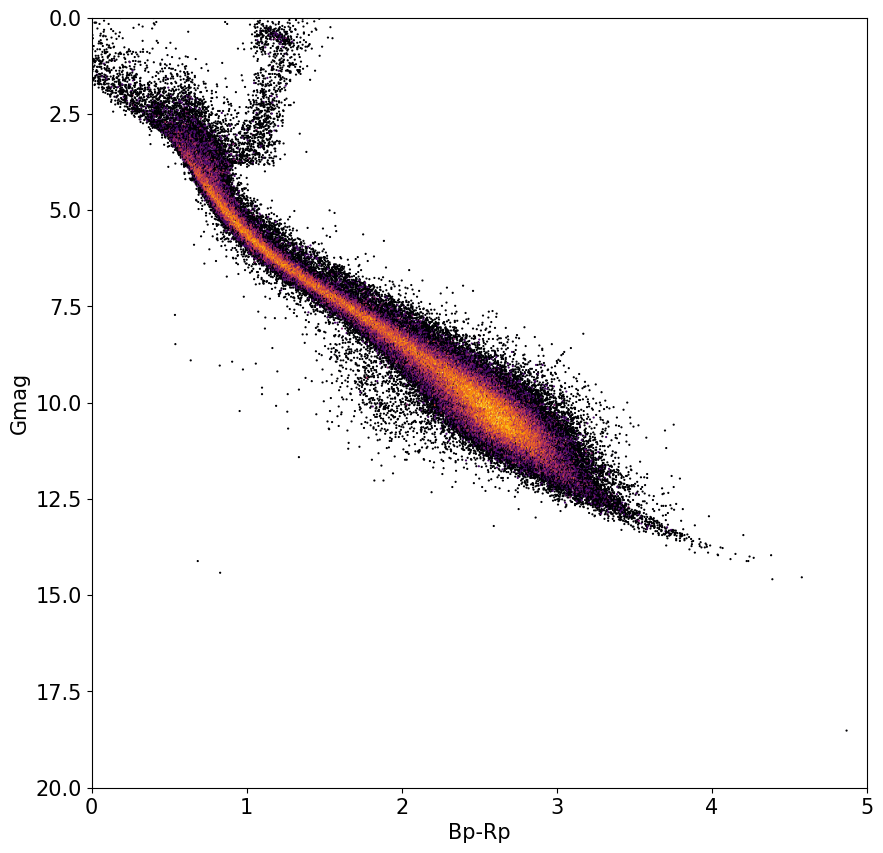

<Figure size 640x480 with 0 Axes>

In [151]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#plots other stars in HR Diagram
plt.hexbin(bp_rp,abs_mag, bins = 'log', gridsize = 1000, cmap = 'inferno', mincnt=1)

#plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
#plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')

plt.ylim(20,0)
plt.xlim(0,5)
plt.ylabel('Gmag', fontsize = 15)
plt.xlabel('Bp-Rp', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('DR3_CMD2.png',dpi=300, facecolor='White')
plt.show()

<Figure size 200x200 with 0 Axes>

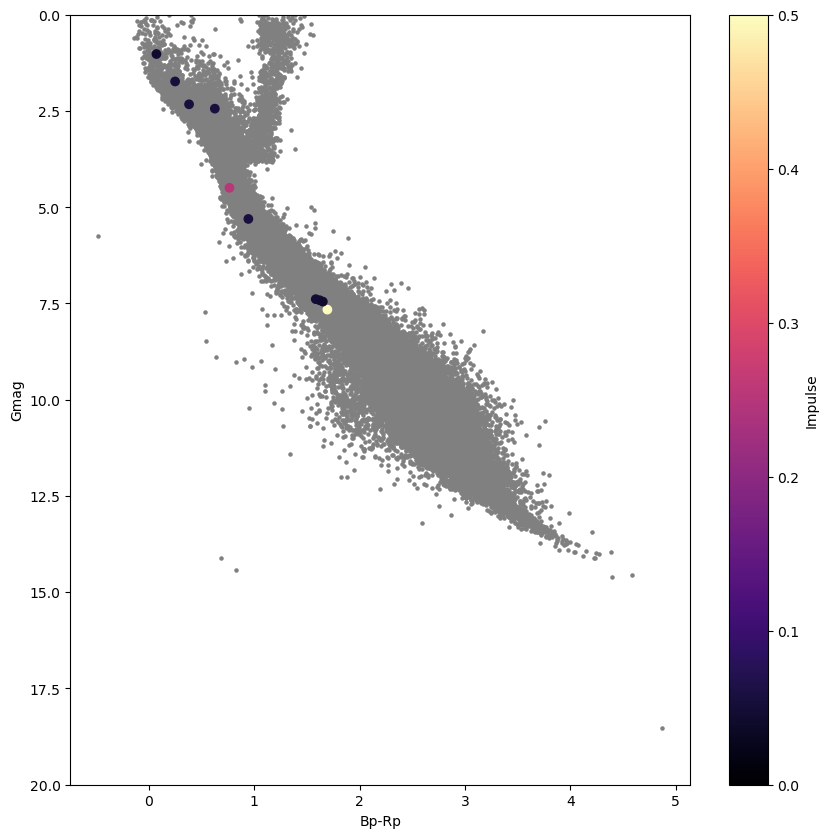

In [153]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#plots other stars in HR Diagram
plt.scatter(bp_rp,abs_mag, s = 5, color = 'grey')

#plots top 10 stars with the highest impulse
plt.scatter(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]], c = impulse1[np.argsort(-1*impulse1)[0:10]], vmin = 0, vmax = 0.5, cmap = 'magma')
#n = [1,2,3,4,5,6,7,8,9,10]
#for i, txt in enumerate(n):
    #plt.annotate(txt, (bp_rp[np.argsort(-1*impulse1)[0:10]][i], abs_mag[np.argsort(-1*impulse1)[0:10]][i]/.99), color = 'white', weight='bold')

cbartitle = plt.colorbar()
cbartitle.set_label('Impulse')
plt.ylim(20,0)
#plt.xlim(0,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

plt.show()
#solid bocks indicates the brown dwarf

<Figure size 500x500 with 0 Axes>

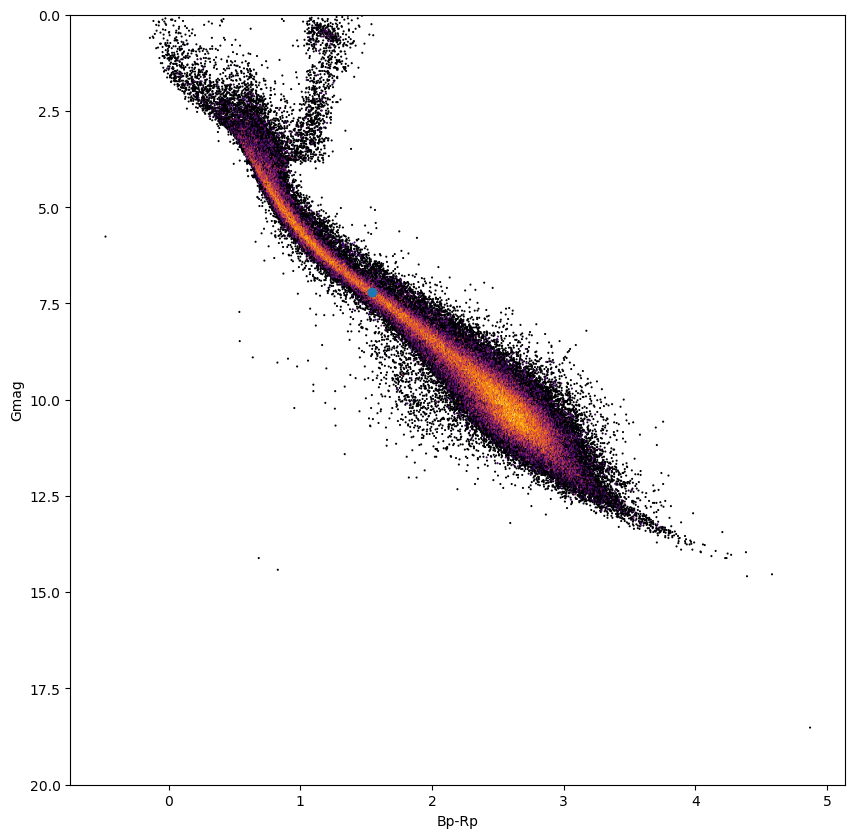

In [150]:
import matplotlib.patheffects as pe
fig = plt.figure(figsize=(5,5))
plt.figure(figsize=(10, 10))

#plots other stars in HR Diagram
plt.hexbin(bp_rp,abs_mag, bins = 'log', gridsize = 1000, cmap = 'inferno', mincnt=1)

#plots top 3 stars with the highest impulse
plt.scatter(bp_rp[np.argsort(-1*med_d_per)[0:1]],abs_mag[np.argsort(-1*med_d_per)[0:1]])
#numbers the top ten points and outlines them in black
#n = ["Gliese710"]
#for i, txt in enumerate(n):
    #plt.annotate(txt, (bp_rp[np.argsort(-1*med_d_per)[0:1]][i], abs_mag[np.argsort(-1*med_d_per)[0:1]][i]/.99), fontsize = 10, color = 'white', weight='bold')

plt.ylim(20,0)
#plt.xlim(0,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')
#plt.savefig('DR3_CMD3.png',dpi=300, facecolor='White')
plt.show()
#solid bocks indicates the brown dwarf

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 200x200 with 0 Axes>

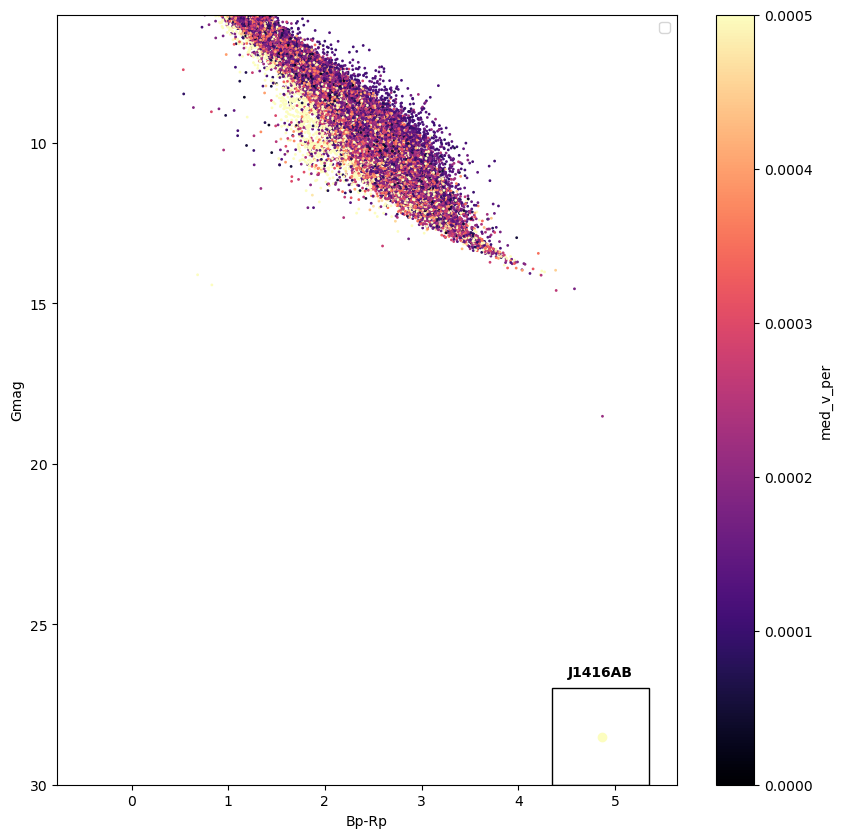

In [151]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

plt.scatter(bp_rp,abs_mag, s = 1,c = med_v_per, vmin = 0, vmax = 100, cmap = 'magma')
plt.scatter(BD_Bp_Rp,BD_abs_mag, c = BD_vtot_array, vmin = 0, vmax = .0005, cmap = 'magma')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle = plt.colorbar()
cbartitle.set_label('med_v_per')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

#plt.plot(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]],color='red',linestyle='None',marker='*' ,label='Largest impulses')


plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 200x200 with 0 Axes>

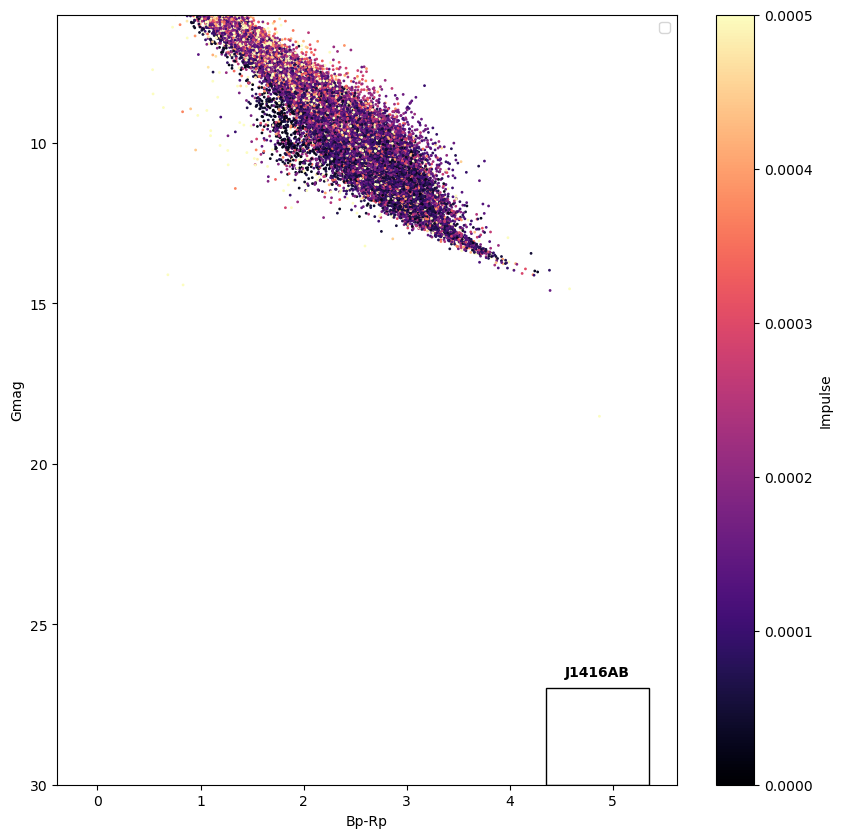

In [152]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#plt.scatter(BD_Bp_Rp,BD_abs_mag, c = area, vmin = 0, vmax = .0005, cmap = 'magma')
plt.scatter(bp_rp,abs_mag, s = 1, c = impulse1, vmin = 0, vmax = .0005, cmap = 'magma')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle = plt.colorbar()
cbartitle.set_label('Impulse')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

#plt.plot(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]],color='red',linestyle='None',marker='*' ,label='Largest impulses')


plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 200x200 with 0 Axes>

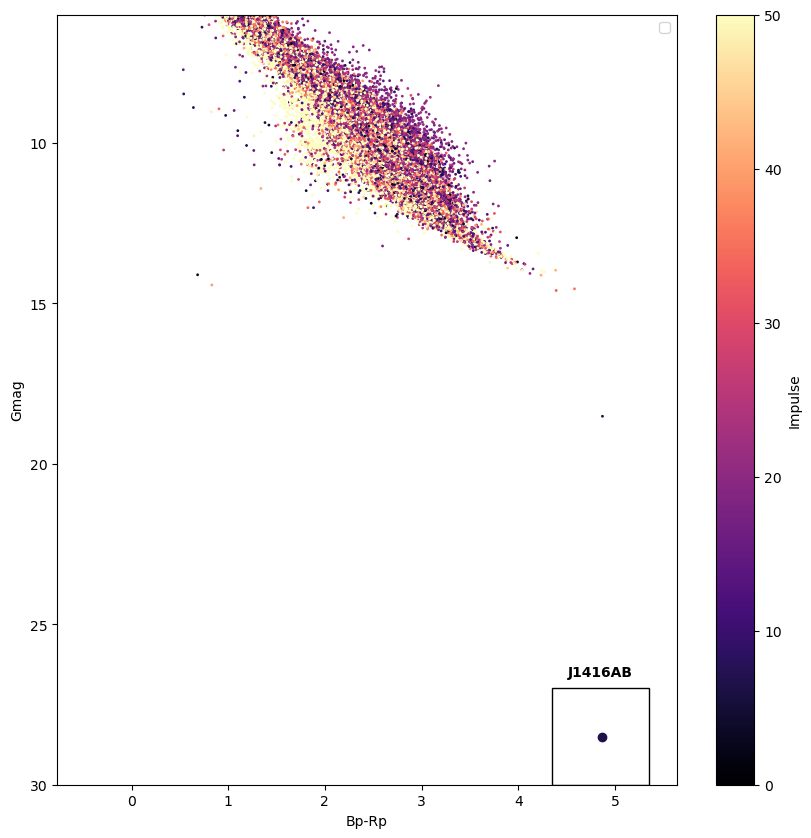

In [153]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

plt.scatter(BD_Bp_Rp,BD_abs_mag, c = BD_vtan_array, vmin = 0, vmax = 50, cmap = 'magma')
plt.scatter(bp_rp,abs_mag, s = 1, c = vtan, vmin = 0, vmax = 50, cmap = 'magma')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle = plt.colorbar()
cbartitle.set_label('Impulse')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

#plt.plot(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]],color='red',linestyle='None',marker='*' ,label='Largest impulses')


plt.legend()

plt.show()

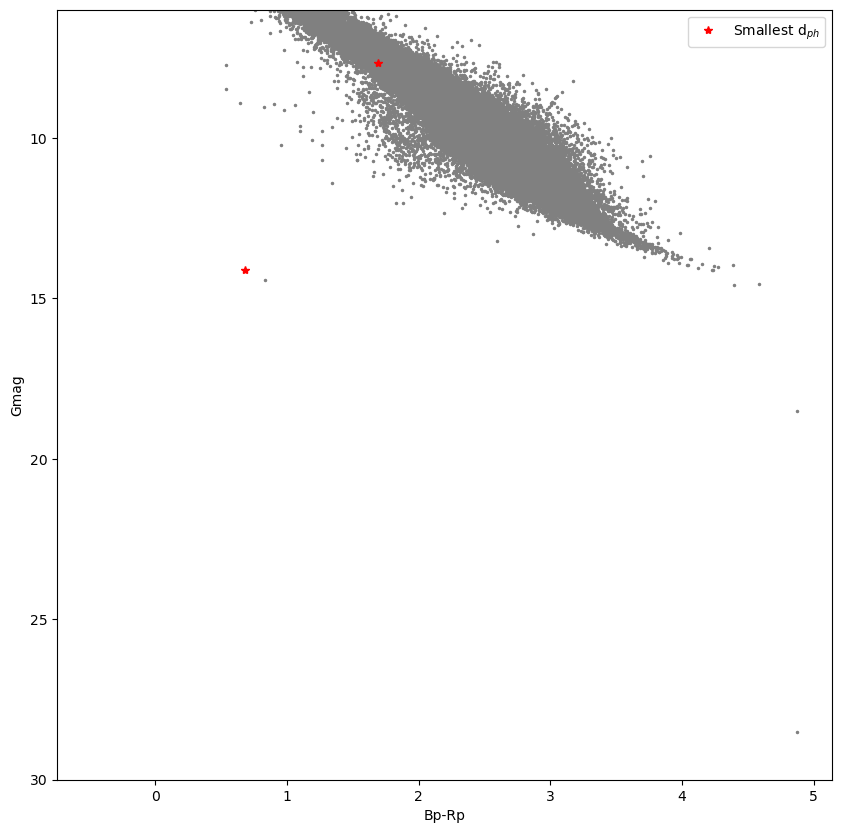

In [154]:
plt.figure(figsize=(10, 10))

plt.plot(BD_Bp_Rp,BD_abs_mag,linestyle='None',marker='.',markersize=3,color='grey')
plt.plot(bp_rp,abs_mag,linestyle='None',marker='.',markersize=3,color='grey')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

plt.plot(bp_rp[np.argsort(med_d_per)[0:2]],abs_mag[np.argsort(med_d_per)[0:2]],color='red',linestyle='None',marker='*' ,label='Smallest d$_{ph}$')
#plt.plot(BD_Bp_Rp,BD_abs_mag,color='black',linestyle='None',marker='*' ,label='Brown dwarf')
plt.legend()

plt.show()

In [155]:
source_id[np.argsort(med_d_per)[0:10]]

array([4.2708146376164879e+18, 5.5447439252126484e+18,
       5.1091161856923904e+17, 5.5712321180900823e+18,
       9.2978837150881229e+17, 3.3721040352754831e+18,
       4.1164513783889516e+18, 1.9528024699185544e+18,
       3.0545094100986721e+18, 3.6003380819859978e+18])

In [156]:
proxima_cen = np.where(source_id==5853498713190525696)
proxima_cen

(array([0]),)

In [157]:
med_d_per[0]

0.9576383354025911

In [158]:
### 1.234 earth radii == white dwarf radii



In [159]:
max(Mass)

3.390534156709559

In [160]:
np.sort(Mass)

array([0.07808660833333333, 0.09138251         , 0.09586999411764703,
       0.09602317941176472, 0.09906028235294118, 0.09979833529411761,
       0.09998659411764704, 0.10024793823529413, 0.10075482352941179,
       0.10233632666666671, 0.10383938999999993, 0.10538699340820312,
       0.10622305333333322, 0.10677656666666663, 0.10754959999999995,
       0.10767401333333336, 0.10848478393554686, 0.1097459716796875 ,
       0.10985936666666664, 0.11019146118164062, 0.11025607999999992,
       0.11048355666666665, 0.11071594848632813, 0.11089373333333336,
       0.11103354666666666, 0.11129217529296875, 0.11133060333333339,
       0.11141243333333328, 0.11243279999999994, 0.11268190666666662,
       0.11309637666666666, 0.11319080666666667, 0.11321694         ,
       0.11362596435546875, 0.11411588745117188, 0.11457232666666671,
       0.11464064666666664, 0.11498126666666654, 0.11500848999023437,
       0.115109619140625  , 0.11534834666666671, 0.11536033999999994,
       0.11537301635

## Zeropoint Correction for Brown Dwarf
https://www.aanda.org/articles/aa/full_html/2021/05/aa39653-20/aa39653-20.html

In [ ]:
OGSample = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/100_parsec_nicer.fits')
OGsample_A3 = Table(OGSample[1].data)

In [ ]:
OGsample_A3

In [ ]:
dfg = OGsample_A3.to_pandas()
new_rowg = {'source_id':1227133699053734528, 'ra':214.10070487061, 'dec':13.80784459098, 'parallax':107.7375, 'parallax_error':0.2163, 'pmra':86.670, 'pmra_error':0.291, 'pmdec':127.953, 'pmdec_error':0.198, 'phot_bp_mean_mag':21.552280, 'phot_bp_mean_flux_over_error':0.204305, 'phot_rp_mean_mag':16.681887, 'phot_rp_mean_flux_over_error':0.009775, 'radial_velocity':-42.38, 'radial_velocity_error':0.5399999999999991, 'teff_gspphot':np.nan}
OGsample_A2 = dfg.append(new_rowg, ignore_index = True)
#df2

In [ ]:
len(OGsample_A2)

In [ ]:
## pull out variables on interest

#radial velocity
Rvel = np.asarray(OGsample_A2["radial_velocity"])
rv=Rvel

rv_e = np.asarray(OGsample_A2["radial_velocity_error"]) 


# PM RA and Dec
PMD = np.asarray(OGsample_A2['pmdec'])
PMR = np.asarray(OGsample_A2['pmra'])
PMR_e = np.asarray(OGsample_A2['pmra_error'])
PMD_e = np.asarray(OGsample_A2['pmdec_error'])

#RA and DEc ICRS
ra = np.asarray(OGsample_A2['ra'])
dec = np.asarray(OGsample_A2['dec'])

#parallax
plx = np.asarray(OGsample_A2['parallax'])
plx_e = np.asarray(OGsample_A2['parallax_error'])

#median distanc

## read in temperature
teff=np.asarray(OGsample_A2['teff_gspphot'])
## temperature has no error

source_id = np.asarray(OGsample_A2["source_id"])

## read in mags
phot_bp_mean_mag = np.asarray(OGsample_A2['phot_bp_mean_mag'])
phot_bp_mean_mag_err = np.asarray(1/OGsample_A2['phot_bp_mean_flux_over_error']) * phot_bp_mean_mag

phot_rp_mean_mag = np.asarray(OGsample_A2['phot_rp_mean_mag'])
phot_rp_mean_mag_err = np.asarray(1/OGsample_A2['phot_rp_mean_flux_over_error']) * phot_rp_mean_mag

## for zero point 
ecl_lat = np.asarray(OGsample_A2['ecl_lat'])
nu_eff_used_in_astrometry = np.asarray(OGsample_A2['nu_eff_used_in_astrometry'])
pseudocolour = np.asarray(OGsample_A2['pseudocolour'])
astrometric_params_solved = np.asarray(OGsample_A2['astrometric_params_solved'])

In [ ]:
med_t_perg = np.mean(t_per,axis=1)/10**6
med_d_perg = np.mean(d_per,axis=1)
med_v_perg = np.mean(vtot_array,axis=1)

In [ ]:
plt.scatter(med_t_perg,med_d_perg, s = 10)
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

In [ ]:
table = df_zp.loc[np.argsort(med_d_perg)[0:10]]

In [ ]:
#table = OGsample_A3_zp[np.argsort(med_d_perg)[0:10]]

In [ ]:
df_zp = OGsample_A3_zp.to_pandas()

In [ ]:
df_zp

In [ ]:
with open('mytable.tex','w') as tf:
    tf.write(table.to_latex())

In [ ]:
OGSample_zp = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/100_parsec_nicer_zp.fits')
OGsample_A3_zp = Table(OGSample_zp[1].data)

In [ ]:
nu_eff_used_in_astrometry[np.argsort(med_d_perg)[0:10]]

In [ ]:
zpt.get_zpt(phot_g_mean_mag[np.argsort(med_d_perg)[0:10]], nu_eff_used_in_astrometry[np.argsort(med_d_perg)[0:10]], pseudocolour[np.argsort(med_d_perg)[0:10]], ecl_lat[np.argsort(med_d_perg)[0:10]], astrometric_params_solved[np.argsort(med_d_perg)[0:10]])

In [ ]:
# zero point correction is needed 
zpt.get_zpt(18.353840, 0, 0.8884, 25.8197157829, 95)

In [ ]:
len(phot_g_mean_mag)

In [ ]:
len(ecl_lat)

## Final Data for Brown Dwarf (Before Orbit Integration)

In [161]:
low_err[167020]

1.4410908743506612

In [162]:
rv[167020]

-42.38

In [163]:
import numpy as np
from astropy.io import ascii
from astropy.table import Table

In [164]:
name = ['J1416AB']
med_t = [0.20890929754426027]
h = [0.21314730322781955]
l = [0.20492157901324234]
med_d = [1.4713661769441306]
hd = [1.503582411696425]
ld = [1.4401609092117487]
parallax = [107.7375]
parallax_off = [-0.045357]
radial = [rv[167020]]
t = Table([name,h,med_t,l,hd,med_d,ld,parallax,parallax_off,radial], names=('Source', '$t_{.95}$','$t^{med}_{ph}$','$t_.05$','$d_.95$','$d^{med}_{ph}$','$d_{.05}$','$Parallax$','$Parallax_{off}$', '$V_r$'), meta={'name': 'first table'})


In [165]:
t 

<Table length=1>
 Source      $t_{.95}$         $t^{med}_{ph}$   ... $Parallax_{off}$  $V_r$ 
  str7        float64             float64       ...     float64      float64
------- ------------------- ------------------- ... ---------------- -------
J1416AB 0.21314730322781955 0.20890929754426027 ...        -0.045357  -42.38

In [166]:
t['$t_{.95}$'].unit = '$myr^{-1}$'
t['$t_.05$'].unit = '$myr^{-1}$'
t['$t^{med}_{ph}$'].unit = '$myr^{-1}$'

t['$d_.95$'].unit = '$pc$'
t['$d_{.05}$'].unit = '$pc$'
t['$d^{med}_{ph}$'].unit = '$pc$'

t['$Parallax$'].unit = 'mas'

t['$V_r$'].unit = '$km/s$'

In [167]:
t

<Table length=1>
 Source      $t_{.95}$         $t^{med}_{ph}$   ... $Parallax_{off}$  $V_r$ 
             $myr^{-1}$          $myr^{-1}$     ...                   $km/s$
  str7        float64             float64       ...     float64      float64
------- ------------------- ------------------- ... ---------------- -------
J1416AB 0.21314730322781955 0.20890929754426027 ...        -0.045357  -42.38

In [168]:
#t['a'] = [1, 2, 3, 4]
#>>> t['b'] = ['a', 'b', 'c', 'd']
#d = {'col1': [1, 2], 'col2': [3, 4]}
t2 = {'name2' : source_id[np.argsort(med_d_per)[0:10]], 'med_t2' : [med_t_per[np.argsort(med_d_per)[0:10]]]}

In [169]:
#df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   #columns=['a', 'b', 'c'])

In [170]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
source10 = source_id[np.argsort(med_d_per)[0:10]].astype('int')
t10 = med_t_per[np.argsort(med_d_per)[0:10]]
th10 = th_err[np.argsort(med_d_per)[0:10]]/10**6
tl10 = tl_err[np.argsort(med_d_per)[0:10]]/10**6
d10 = med_d_per[np.argsort(med_d_per)[0:10]]
hd10 = high_err[np.argsort(med_d_per)[0:10]]
ld10 = low_err[np.argsort(med_d_per)[0:10]]
plx10 = plx[np.argsort(med_d_per)[0:10]]
rv10 = rv[np.argsort(med_d_per)[0:10]]

In [171]:
plx[np.argsort(med_d_per)[0:10]]

array([ 52.396292205290564,  89.50642598239092 ,  13.211847460727075,
        10.233998278278987,  13.69773001868134 ,  11.978683427483697,
        11.865455846541849, 141.89460573855888 ,  24.962767008390347,
        25.90908948780624 ])

In [172]:
source10

array([4270814637616487936, 5544743925212648448,  510911618569239040,
       5571232118090082304,  929788371508812288, 3372104035275483136,
       4116451378388951552, 1952802469918554368, 3054509410098672128,
       3600338081985997824])

In [173]:
g = np.vstack((source10.astype('int'), t10, th10, tl10, d10, hd10, ld10, plx10, rv10)).T

In [174]:
df67 = pd.DataFrame(g, columns=['SourceID', '$t_{.95}$','$t^{med}_{ph}$','$t_.05$','$d_.95$','$d^{med}_{ph}$','$d_{.05}$','Parallax', '$V_r$'])


In [175]:
df67

SourceID  $t_{.95}$  $t^{med}_{ph}$   $t_.05$   $d_.95$  \
0  4.270815e+18   1.295361        1.332107  1.260080  0.051364   
1  5.544744e+18   0.026460        0.027381  0.025667  0.102751   
2  5.109116e+17  -2.766964       -2.730072 -2.804395  0.151655   
3  5.571232e+18  -1.158473       -1.148945 -1.168139  0.258280   
4  9.297884e+17  -0.365391       -0.345194 -0.385837  0.494248   
5  3.372104e+18   1.730117        1.997056  1.516630  0.496373   
6  4.116451e+18   0.311669        0.330299  0.293430  0.538574   
7  1.952802e+18   0.082576        0.082866  0.082287  0.568919   
8  3.054509e+18  -0.556727       -0.552231 -0.561302  0.597839   
9  3.600338e+18   1.018352        1.106718  0.935092  0.609104   

   $d^{med}_{ph}$  $d_{.05}$    Parallax       $V_r$  
0        0.055370   0.047301   52.396292  -14.419985  
1        0.106336   0.099680   89.506426 -373.736664  
2        0.192389   0.110413   13.211847   26.756247  
3        0.268038   0.247956   10.233998   82.479950  
4        0.524309   0.465246   13.697730  195.679184  
5        0.587343   0.420139   11.978683  -47.449196  
6        0.610689   0.475110   11.865456 -264.406464  
7        0.570972   0.566858  141.894606  -82.911392  
8        0.604234   0.591748   24.962767   70.350563  
9        0.675426   0.545003   25.909089  -37.172897

In [176]:
GSample_A2.columns

Index(['SOURCE_ID_1', 'RA_1', 'RA_ERROR_1', 'DEC_1', 'DEC_ERROR_1',
       'PARALLAX_1', 'PARALLAX_ERROR_1', 'PMRA_1', 'PMRA_ERROR_1', 'PMDEC_1',
       'PMDEC_ERROR_1', 'PHOT_G_MEAN_MAG_1', 'PHOT_G_MEAN_FLUX_OVER_ERROR_1',
       'PHOT_BP_MEAN_MAG_1', 'PHOT_BP_MEAN_FLUX_OVER_ERROR_1',
       'PHOT_RP_MEAN_MAG_1', 'PHOT_RP_MEAN_FLUX_OVER_ERROR_1',
       'PHOT_BP_RP_EXCESS_FACTOR_1', 'RUWE_1', 'IPD_FRAC_MULTI_PEAK_1',
       'ADOPTEDRV', 'ADOPTEDRV_ERROR', 'ADOPTEDRV_REFNAME',
       'RADIAL_VELOCITY_IS_VALID', 'GCNS_PROB', 'WD_PROB', 'DIST_1', 'DIST_16',
       'DIST_50', 'DIST_84', 'XCOORD_50', 'XCOORD_16', 'XCOORD_84',
       'YCOORD_50', 'YCOORD_16', 'YCOORD_84', 'ZCOORD_50', 'ZCOORD_16',
       'ZCOORD_84', 'UVEL_50', 'UVEL_16', 'UVEL_84', 'VVEL_50', 'VVEL_16',
       'VVEL_84', 'WVEL_50', 'WVEL_16', 'WVEL_84', 'NAME_GUNN', 'REFNAME_GUNN',
       'GMAG_GUNN', 'E_GMAG_GUNN', 'RMAG_GUNN', 'E_RMAG_GUNN', 'IMAG_GUNN',
       'E_IMAG_GUNN', 'ZMAG_GUNN', 'E_ZMAG_GUNN', 'NAME_2MASS', 'J_

In [177]:
short_table = GSample_A2.loc[[0,2,3,4,5,6,7,9,10,11,12], ["SOURCE_ID_1", "RA_1", "DEC_1", 'PARALLAX_1', 'PARALLAX_ERROR_1', 'ADOPTEDRV', 'ADOPTEDRV_ERROR', 'PHOT_BP_MEAN_MAG_1', 'PHOT_BP_MEAN_FLUX_OVER_ERROR_1',
       'PHOT_RP_MEAN_MAG_1', 'PHOT_RP_MEAN_FLUX_OVER_ERROR_1']]

In [178]:
short_table['SOURCE_ID_1'].astype(int)

0     5853498713190525952
2      762815470562110464
3     4075141768785646592
4     1926461164913660160
5     6553614253923452928
6     1872046574983497216
7     1872046609345556480
9     2154880616774131712
10     385334230892516480
11     385334196532776576
12    6412595290592308224
Name: SOURCE_ID_1, dtype: int64

In [179]:
short_table2 = short_table.convert_dtypes(infer_objects=False, convert_string=False, convert_integer=True, convert_boolean=False, convert_floating=False)

In [180]:
 TableGaia = Table.from_pandas(short_table2.round(2))

In [181]:
TableGaia

<Table length=11>
    SOURCE_ID_1       RA_1  ... PHOT_RP_MEAN_FLUX_OVER_ERROR_1
       object       float64 ...            float64            
------------------- ------- ... ------------------------------
5853498713190525952  217.39 ...                         618.53
 762815470562110464  165.83 ...                        1037.64
4075141768785646592  282.46 ...                         798.31
1926461164913660160  355.48 ...                        1637.91
6553614253923452928   346.5 ...                         833.35
1872046574983497216  316.75 ...                         466.02
1872046609345556480  316.75 ...                         379.86
2154880616774131712  280.68 ...                        1286.54
 385334230892516480    4.61 ...                         2605.3
 385334196532776576    4.63 ...                        2125.92
6412595290592308224  330.87 ...                         510.44

In [ ]:
ascii.write(TableGaia, format='latex')  

In [ ]:
go = np.vstack((source10.astype('int'), rv10, plx10, plx_e, PMDa, PMD_ea, PMRa, PMD_ea, dec_a, ra_a)).T

In [ ]:
df67 = pd.DataFrame(go, columns=['SourceID', '$V_r$', 'Parallax', 'Parallax error', 'Proper Motion Dec', 'Proper Motion Dec Error','Proper Motion RA','Proper Motion RA Error', 'Dec', 'RA'])



In [ ]:
df68 = df67.convert_dtypes(infer_objects=False, convert_string=False, convert_integer=True, convert_boolean=False, convert_floating=False)

In [ ]:
df68

In [ ]:
table34 = Table.from_pandas(df68)

In [ ]:
df68['SourceID'].astype('int')

In [ ]:
table34

table34['$t_{.95}$'].unit = '$myr^{-1}$'
table34['$t^{med}_{ph}$'].unit = '$myr^{-1}$'
table34['$t_.05$'].unit = '$myr^{-1}$'

table34['$d_.95$'].unit = '$pc$'
table34['$d^{med}_{ph}$'].unit = '$pc$'
table34['$d_{.05}$'].unit = '$pc$'

table34['Parallax'].unit = 'mas'

table34['$V_r$'].unit = '$km/s$'

In [ ]:
table34.round(2)

In [ ]:
ascii.write(table34, format='latex')  

In [ ]:
[med_t_per[np.argsort(med_d_per)[0:10]]]

In [ ]:
t2 as pandas
with open('mytable2.tex','w') as tf:
    tf.write(t2.to_latex())

In [ ]:
#np.seterr(divide='ignore')
#mask = (t2['$d^{med}_{ph}$'] < 1) % (t2['$d^{med}_{ph}$'] < 0)  # Table rows where column a > 4
#t2[mask]  


In [ ]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
source10bd = source_idbd[np.argsort(med_d_perbd)[0:10]]
t10bd = med_t_perbd[np.argsort(med_d_perbd)[0:10]]
th10bd = th_errbd[np.argsort(med_d_perbd)[0:10]]/10**6
tl10bd = tl_errbd[np.argsort(med_d_perbd)[0:10]]/10**6
d10bd = med_d_perbd[np.argsort(med_d_perbd)[0:10]]
hd10bd = high_errbd[np.argsort(med_d_perbd)[0:10]]
ld10bd = low_errbd[np.argsort(med_d_perbd)[0:10]]
plx10bd = plxbd[np.argsort(med_d_perbd)[0:10]]
rv10bd = rvbd[np.argsort(med_d_perbd)[0:10]]

In [ ]:
gbd = np.vstack((source10bd, t10bd, th10bd, tl10bd, d10bd, hd10bd, ld10bd, plx10bd, rv10bd)).T

In [ ]:
df67bd = pd.DataFrame(gbd, columns=['SourceID', '$t_{.95}$','$t^{med}_{ph}$','$t_.05$','$d_.95$','$d^{med}_{ph}$','$d_{.05}$','Parallax', '$V_r$'])

In [ ]:
df68bd = df67bd.convert_dtypes(infer_objects=False, convert_string=False, convert_integer=True, convert_boolean=False, convert_floating=False)

In [ ]:
df69bd = df68bd

In [ ]:
df69bd

In [ ]:
J0720-0846

In [ ]:
df69bd.astype('float')

In [ ]:
table36 = Table.from_pandas(df68bd)

In [ ]:
table36['$t_{.95}$'].unit = '$myr^{-1}$'
table36['$t^{med}_{ph}$'].unit = '$myr^{-1}$'
table36['$t_.05$'].unit = '$myr^{-1}$'

table36['$d_.95$'].unit = '$pc$'
table36['$d^{med}_{ph}$'].unit = '$pc$'
table36['$d_{.05}$'].unit = '$pc$'

table36['Parallax'].unit = 'mas'

table36['$V_r$'].unit = '$km/s$'

In [ ]:
df68bd = df68bd.apply(pd.to_numeric, errors='ignore', downcast='float')

In [ ]:
table36

In [ ]:
table36.round(2)

In [ ]:
ascii.write(table36, format='latex')  

## Orbit Integration (Galpy)

In [ ]:
from galpy.orbit import Orbit
from galpy.util.coords import rect_to_cyl

In [ ]:
#test with proxima centauri

In [ ]:
x[1561]

In [ ]:
y[1561]

In [ ]:
z[1561]

In [ ]:
plx[1561]

In [ ]:
1/plx[1561]

In [ ]:
PMR[1561]

In [ ]:
PMD[1561]

In [ ]:
rv[1561]

In [ ]:
from astropy import units
op= Orbit([8.*units.kpc,22.*units.km/units.s,242*units.km/units.s,0.*units.kpc,22.*units.km/units.s,0.*units.deg])

In [ ]:
med_t_per[1561]

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
#c= SkyCoord(ra=274.96183629691126*u.deg,dec=-1.938612759804832*u.deg,distance=.01908531993221894*u.pc,
                #pm_ra_cosdec=-0.4140637404226508*u.mas/u.yr,pm_dec=-0.10847507667730025*u.mas/u.yr,
                #radial_velocity=-14.419984817504883*u.km/u.s)
c= SkyCoord(ra=274.96183629691126*u.deg,dec=-1.938612759804832*u.deg,distance=.01908531993221894*u.pc,
                pm_ra_cosdec=-0.4140637404226508*u.mas/u.yr,pm_dec=-0.10847507667730025*u.mas/u.yr,
                radial_velocity=-14.419984817504883*u.km/u.s,
                galcen_distance=8.*u.kpc,z_sun=15.*u.pc,
                galcen_v_sun=CartesianDifferential([10.0,235.,7.]*u.km/u.s))
o= Orbit(c)

In [ ]:
import galpy.potential as galpy_p
mp = galpy_p.MiyamotoNagaiPotential(a=0.5, b=0.0375, amp=1., normalize=1.)

In [ ]:
#from galpy.potential import MWPotential2014
ts= np.linspace(0,2*1.2935375339313313*u.Myr,1000)
o.integrate(ts,mp, method = 'rk6_c')

In [ ]:
o.plot3d(alpha=0.4)

In [ ]:
ts[86]

In [ ]:
ts

In [ ]:
x = o.helioX(ts)
y = o.helioY(ts)
z = o.helioZ(ts)

In [ ]:
x

In [ ]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [ ]:
find_nearest(x, 0.051381659297203425)

In [ ]:
np.where(x == 0.05141053157092192)

In [ ]:
(-0.05141053157092192 + 0.05137187753532431)/0.05141053157092192


In [ ]:
x = o.dist(ts)
p = o.phi(ts)
r = o.r(ts)
v = o.V(ts)

In [ ]:
#o= Orbit.from_name('Omega Cen')
from galpy.potential import MWPotential2014
o.plot()
o.plot([o.R()],[o.z()],'ro')

In [ ]:
from astropy.coordinates import CartesianDifferential
cs = rect_to_cyl(-8.122, 0, 0.020800000000000003)
os= Orbit(cs)

In [ ]:
os.integrate(ts,mp, method = 'rk6_c')

In [ ]:
os.plot3d(alpha=0.4)

In [ ]:
c

In [ ]:
os.integrate(ts,mp, method = 'rk6_c')

In [ ]:
from astropy.coordinates import CartesianDifferential
c = rect_to_cyl(16.819979068568596, 8.786106119682833, 2.0382015069559283)
o= Orbit(c)

In [ ]:
o.integrate(ts,mp, method = 'rk6_c')

In [ ]:
o.plot3d(alpha=0.4)

In [ ]:
plt.scatter(ts, dist_tot)

In [ ]:
xs = np.asarray(os.helioX(ts))
ys = np.asarray(os.helioY(ts))
zs = np.asarray(os.helioZ(ts))

In [ ]:
x = np.asarray(o.helioX(ts))
y = np.asarray(o.helioY(ts))
z = np.asarray(o.helioZ(ts))

In [ ]:
Dist_x = (xs - x)**2 
Dist_y = (ys - y)**2 
Dist_z = (zs - z)**2

In [ ]:
dist_tot = ((xs - x)**2 + (ys - y)**2 + (zs - z)**2)**.5

In [ ]:
min(dist_tot)

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(Dist_x, Dist_y, Dist_z, 'red')

In [ ]:
plt.scatter(ts, dist_tot)

In [ ]:
plt.scatter(ts,xs, label = 'sun')
plt.scatter(ts,x, label = 'gliese 710')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()

In [ ]:
]\[poiuytrew\=]-[0p7654321q`=-09]

In [ ]:
o.V(ts)

In [ ]:
#172 = index of time step where distance equals perihelion (as close as possible)

In [ ]:
med_d_per[1561]

# Gala Orbit

In [ ]:
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import ICRS
import astropy.coordinates as apycord

from mpl_toolkits.mplot3d import Axes3D
from pyia import GaiaData

# Gala
import gala.dynamics as gd
import gala.potential as gp
%matplotlib widget
from startup import *
import gala.integrate as gi

In [ ]:
with coord.galactocentric_frame_defaults.set("v4.0"):
    galcen_frame = coord.Galactocentric()

sun_xyz = u.Quantity(
    [-8.122*u.kpc, 0 * u.kpc, galcen_frame.z_sun]  # x,y,z
)
sun_vxyz = galcen_frame.galcen_v_sun
sun_vxyz

sun_w0 = gd.PhaseSpacePosition(pos=sun_xyz, vel=sun_vxyz)
print(sun_w0)

In [ ]:
mw_potential = gp.MilkyWayPotential()
mw_potential
for k, pot in mw_potential.items():
    print(f"{k}: {pot!r}")

In [ ]:
sun_orbit = mw_potential.integrate_orbit(sun_w0, dt=0.5 * u.Myr, t1=0, t2=.0012950865659592086 * u.Gyr,Integrator=gi.DOPRI853Integrator, nsteps = 1000)
fig, ax = sun_orbit.plot_3d()

lim = (-12, 12)
ax.set(xlim=lim, ylim=lim, zlim=lim)

In [ ]:
plt.scatter(ts, sun_orbit)

In [ ]:
BG_ra = 274.96183629691126 ; BG_dec = -1.938612759804832; BG_dist = .0001908531993221894
pmra_BG = -0.4140637404226508 ; pmdec_BG = -0.10847507667730025
rv_BG = -14.419984817504883

In [ ]:
# --- ok lets now compute some velocities with EDR3 data! We start by making a defintion to do this.
def compute_vels(ra, dec, pmra, pmdec, rv, dist, V0=[11.1, 12.24+235, 7.25], R0=8.122):
    # define an ICRS coord for each star
    icrs = ICRS(
        ra=ra * u.deg,
        dec=dec * u.deg,
        distance=dist * u.kpc,
        pm_ra_cosdec=pmra * u.mas / u.yr,
        pm_dec=pmdec * u.mas / u.yr,
        radial_velocity=rv * u.km / u.s,
    )
    print(icrs)
    # Define the Galactic non-rotating rest frame: (V0 = solar velocity in Galactic rest fram; R0 = solar radius)
    v_sun = apycord.CartesianDifferential(V0 * u.km / u.s)
    gc_frame = apycord.Galactocentric(galcen_distance=R0 * u.kpc, z_sun=25.0 * u.pc, galcen_v_sun=v_sun)
    # convert to GC frame
    cg = icrs.transform_to(gc_frame) 
    cg.representation= 'cartesian'
    VX = cg.v_x.value
    VY = cg.v_y.value
    VZ = cg.v_z.value
    

    return VX, VY, VZ,cg.x.value,cg.y.value,cg.z.value

In [ ]:
#cg = compute_vels(BG_ra, BG_dec, pmra_BG, pmdec_BG, rv_BG, BG_dist)

VXBG, VYBG, VZBG,XBG,YBG,ZBG = compute_vels(BG_ra, BG_dec, pmra_BG, pmdec_BG, rv_BG, BG_dist)
BG_xyz = (XBG,YBG,ZBG)*u.pc ;  BG_vxvyvz = (VXBG, VYBG, VZBG)*u.km/u.s


In [ ]:
plt.close('all')
BG_w0 = gd.PhaseSpacePosition(pos=BG_xyz, vel=BG_vxvyvz)
BG_orbit = mw_potential.integrate_orbit(BG_w0, dt=0.05 * u.Myr, t1=0, t2=.0012950865659592086 * u.Gyr,Integrator=gi.DOPRI853Integrator, nsteps = 1000)
fig, ax = sun_orbit.plot_3d(linewidth = .5)
fig1, ax1 = BG_orbit.plot_3d(ax=ax,color='r')

lim = (-12, 12)
ax.set(xlim=lim, ylim=lim, zlim=lim)


In [ ]:
galpy_orbit = BG_orbit.to_galpy_orbit()

In [ ]:
galpy_orbit

In [ ]:
galpy_orbit_sun = sun_orbit.to_galpy_orbit()

In [ ]:
galpy_orbit_sun

In [ ]:
t = np.linspace(0, .0012950865659592086, 1001)

In [ ]:
xgalpy = galpy_orbit.dist()

In [ ]:
xgalpys = galpy_orbit_sun.dist()

In [ ]:
len(xgalpy)

In [ ]:
len(xgalpys)

In [ ]:
xg = np.asarray(xgalpy)

In [ ]:
plt.scatter(xg,t)

In [ ]:
xgalpys

In [ ]:
plt.scatter(1001, xgalpys)